## Input

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_train=pd.read_csv("/home/harshit/Desktop/QuantForecast/Assignment2/santander-customer-transaction-prediction/train.csv")
df_test=pd.read_csv("santander-customer-transaction-prediction/test.csv")

In [3]:
df=df_train

In [4]:
print(df.head())


   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0

In [5]:
print(df.describe())


              target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.8831

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
objectcolumn=df.select_dtypes(include='object')
print(objectcolumn)

             ID_code
0            train_0
1            train_1
2            train_2
3            train_3
4            train_4
...              ...
199995  train_199995
199996  train_199996
199997  train_199997
199998  train_199998
199999  train_199999

[200000 rows x 1 columns]


## EDA

In [8]:
print(df.isnull().sum())

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64


In [9]:
df.dropna()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [10]:
df.drop(columns=['ID_code'],inplace=True)

In [11]:
correlations=df.corr()['target'].sort_values()

print("Maximum positive correlation=",correlations.tail(10))
print("Maximum negative correlation=",correlations.head(10))

Maximum positive correlation= var_133    0.054548
var_2      0.055870
var_190    0.055973
var_99     0.058367
var_22     0.060558
var_26     0.062422
var_53     0.063399
var_110    0.064275
var_6      0.066731
target     1.000000
Name: target, dtype: float64
Maximum negative correlation= var_81    -0.080917
var_139   -0.074080
var_12    -0.069489
var_146   -0.063644
var_76    -0.061917
var_174   -0.061669
var_21    -0.058483
var_166   -0.057773
var_80    -0.057609
var_165   -0.055734
Name: target, dtype: float64


## Handling outliers

In [12]:
def remove_outliers_zscore(df, features, z_score_threshold=5):
    for feature in features:
        mean_value = df[feature].mean()
        std_dev = df[feature].std()

        df[f'{feature}_z_score'] = (df[feature] - mean_value) / std_dev

        outliers = df[abs(df[f'{feature}_z_score']) > z_score_threshold]
        df = df[abs(df[f'{feature}_z_score']) <= z_score_threshold]

        print("Number of outliers removed for ",feature,":", len(outliers))
        print("Z-Score Threshold:", z_score_threshold)

    return df.drop(columns=[f'{feature}_z_score' for feature in features])

# Assuming 'df' is your DataFrame
list_of_features = df.columns.tolist()
df = remove_outliers_zscore(df, features=list_of_features, z_score_threshold=3)
df.info()

Number of outliers removed for  target : 0
Z-Score Threshold: 3
Number of outliers removed for  var_0 : 23
Z-Score Threshold: 3
Number of outliers removed for  var_1 : 9
Z-Score Threshold: 3
Number of outliers removed for  var_2 : 8
Z-Score Threshold: 3
Number of outliers removed for  var_3 : 22
Z-Score Threshold: 3
Number of outliers removed for  var_4 : 60
Z-Score Threshold: 3
Number of outliers removed for  var_5 : 6
Z-Score Threshold: 3
Number of outliers removed for  var_6 : 39
Z-Score Threshold: 3
Number of outliers removed for  var_7 : 20
Z-Score Threshold: 3
Number of outliers removed for  var_8 : 7
Z-Score Threshold: 3
Number of outliers removed for  var_9 : 0
Z-Score Threshold: 3
Number of outliers removed for  var_10 : 75
Z-Score Threshold: 3
Number of outliers removed for  var_11 : 114
Z-Score Threshold: 3
Number of outliers removed for  var_12 : 17
Z-Score Threshold: 3
Number of outliers removed for  var_13 : 1
Z-Score Threshold: 3
Number of outliers removed for  var_14 : 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188964 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 291.2 MB


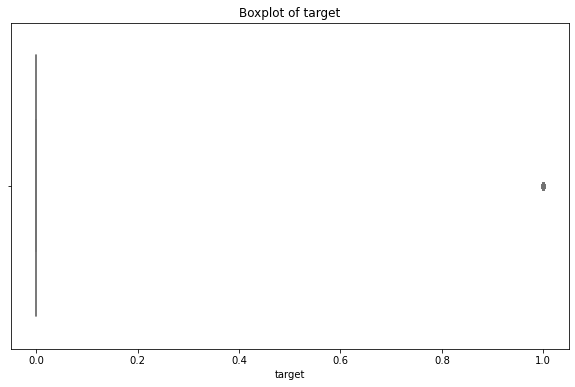

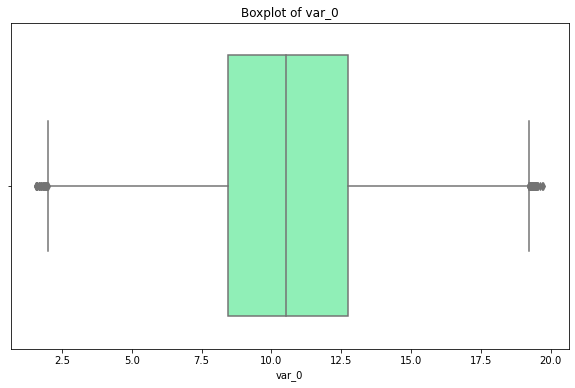

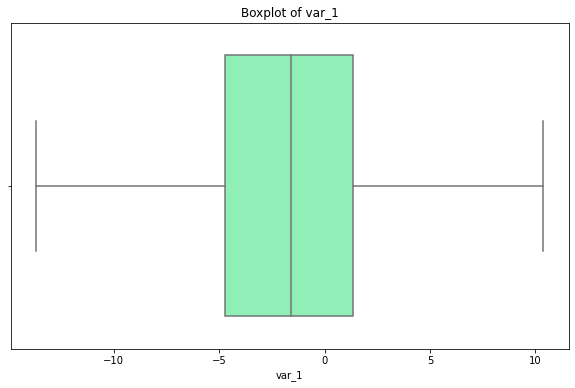

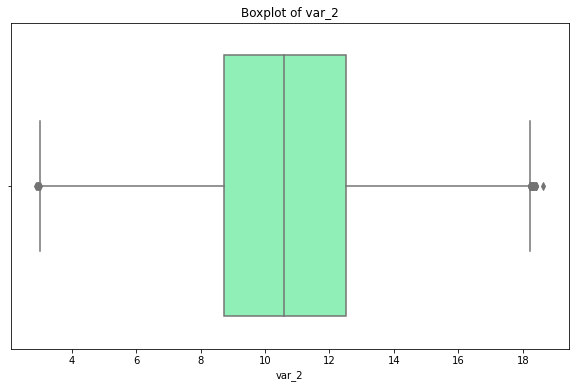

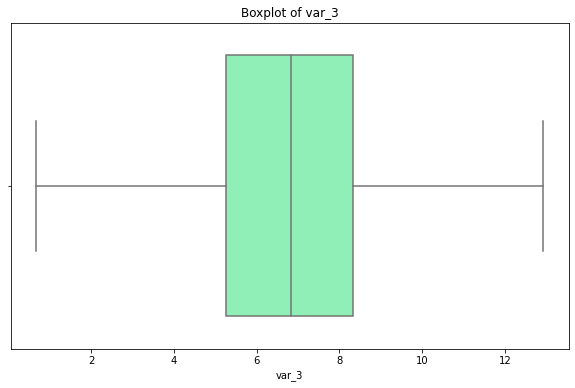

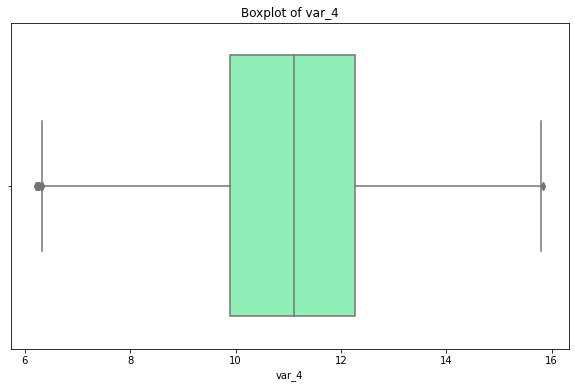

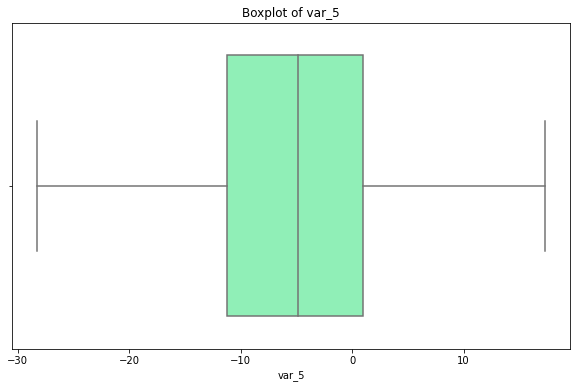

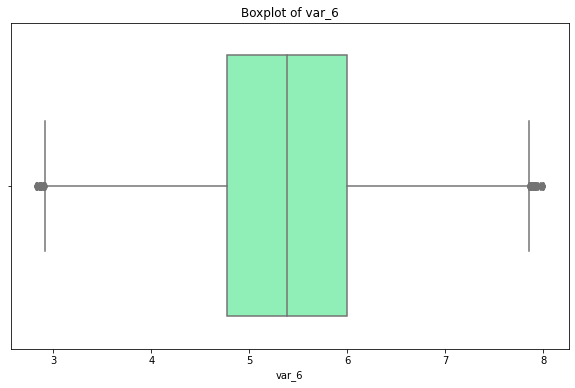

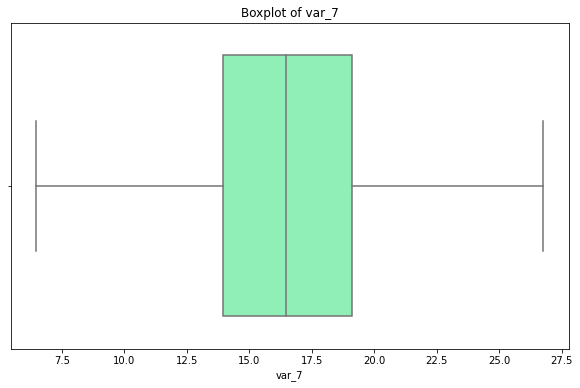

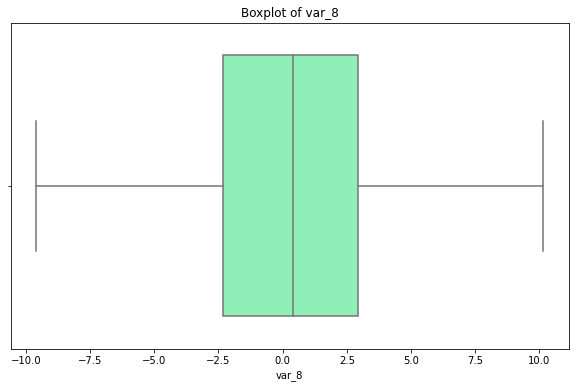

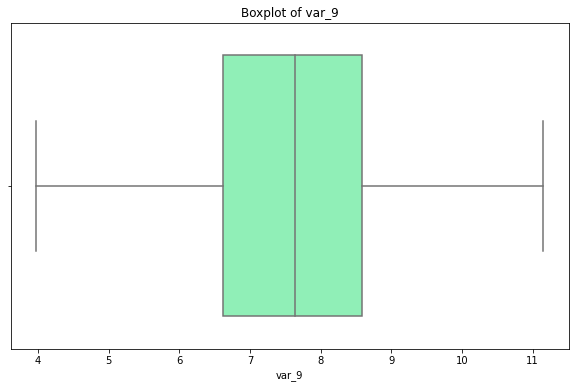

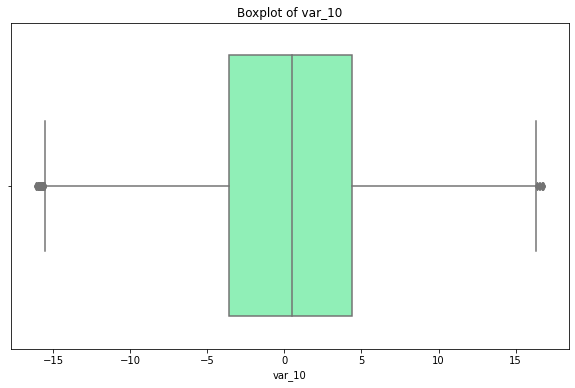

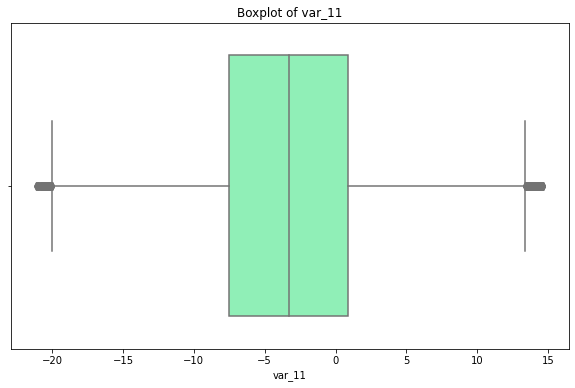

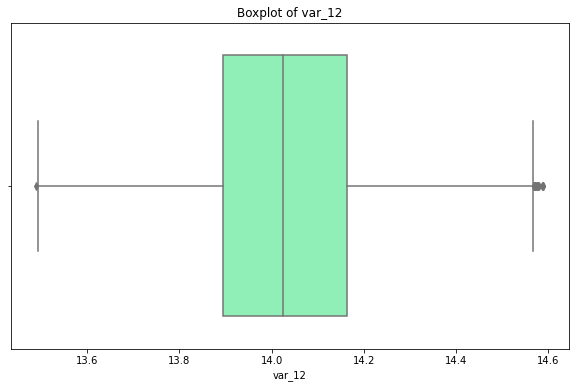

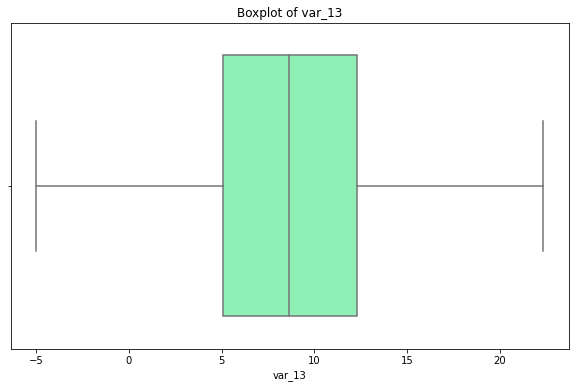

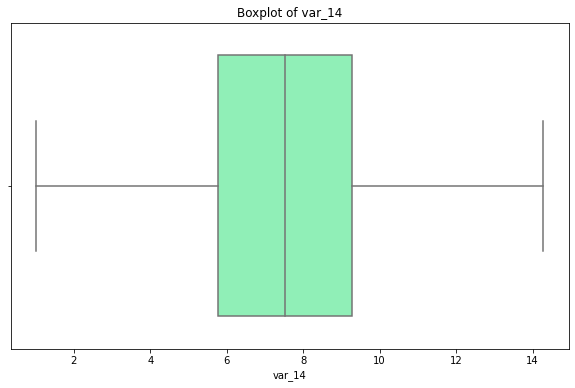

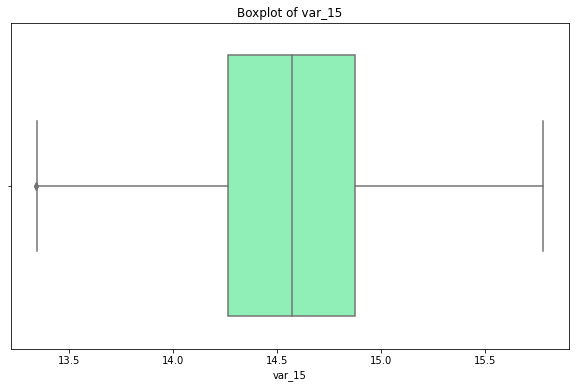

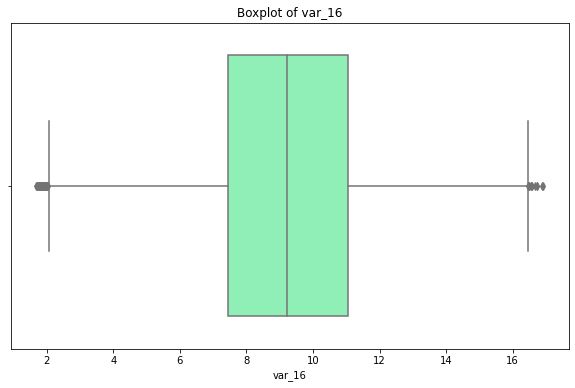

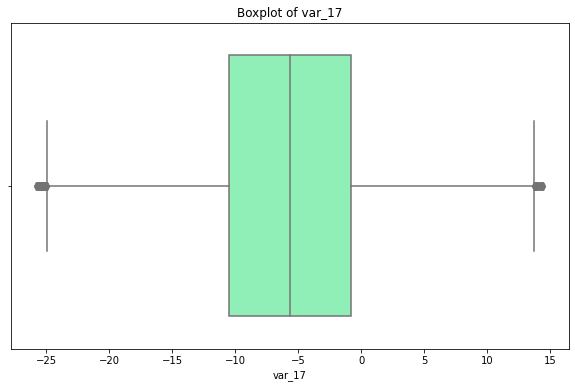

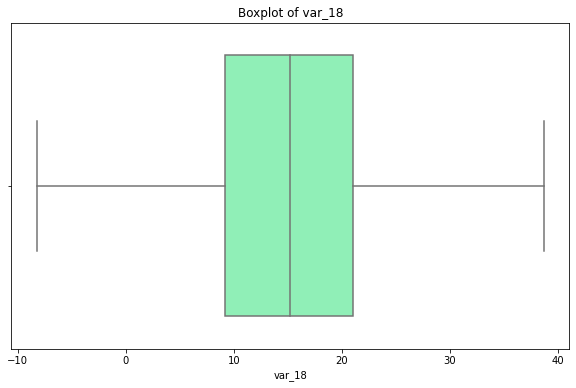

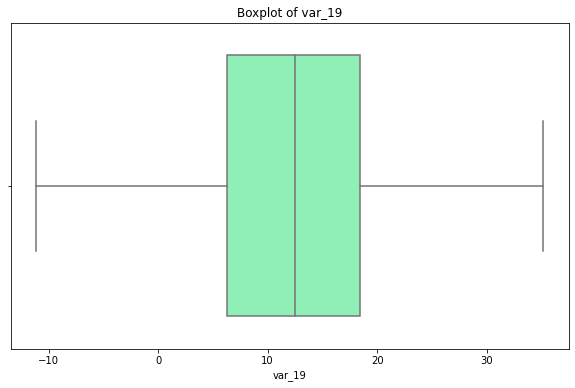

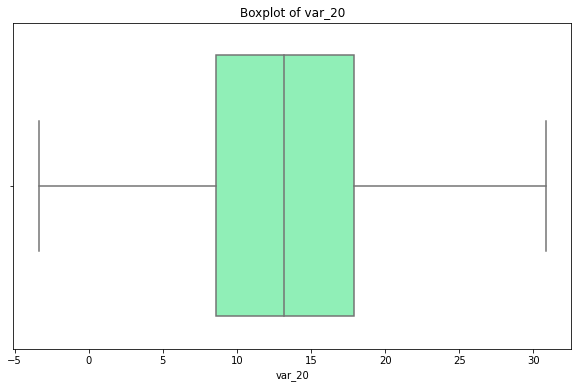

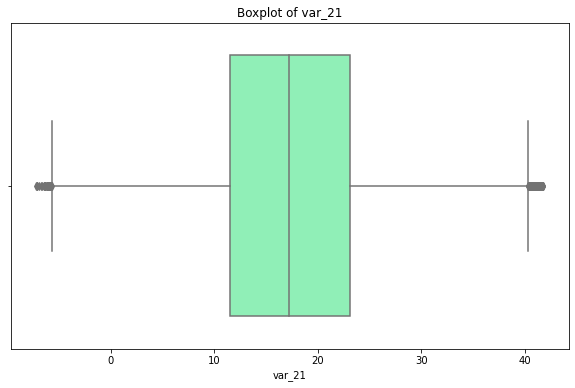

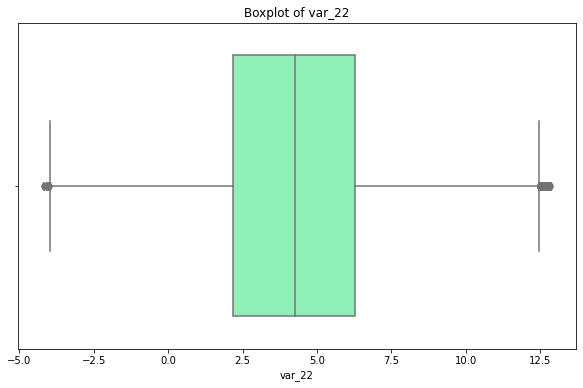

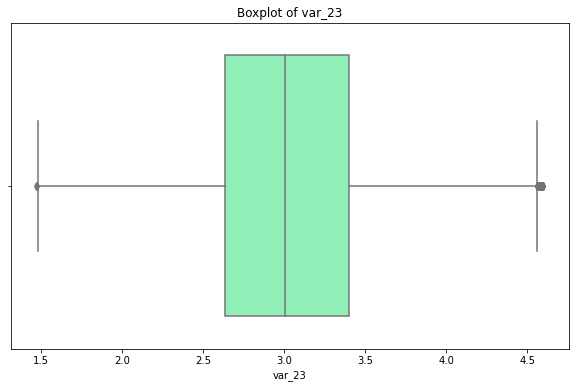

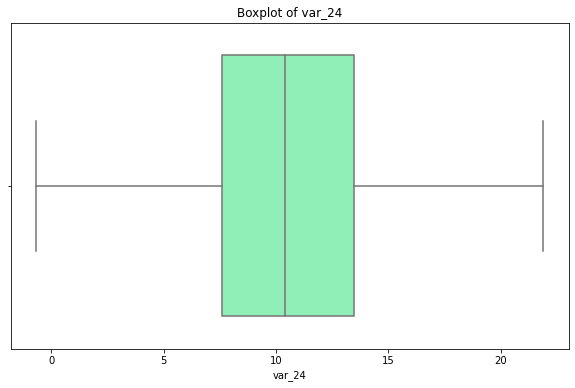

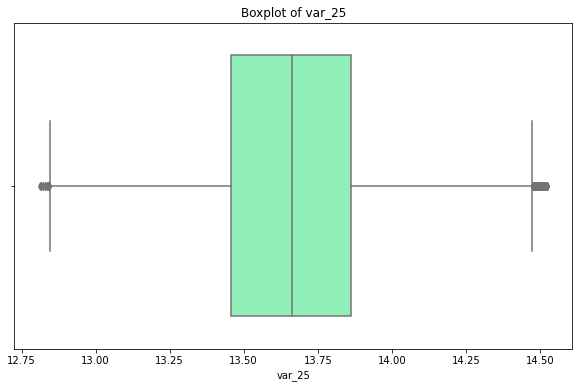

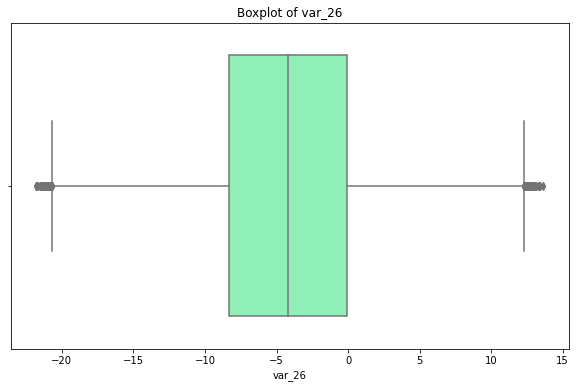

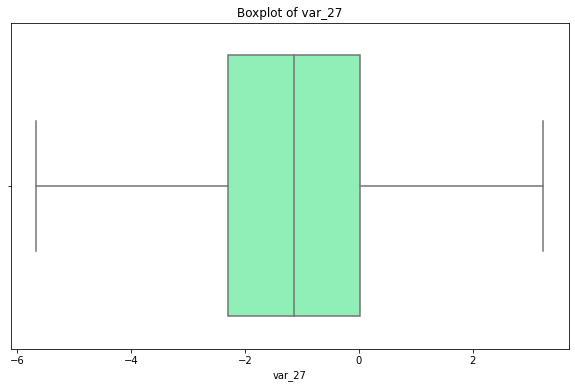

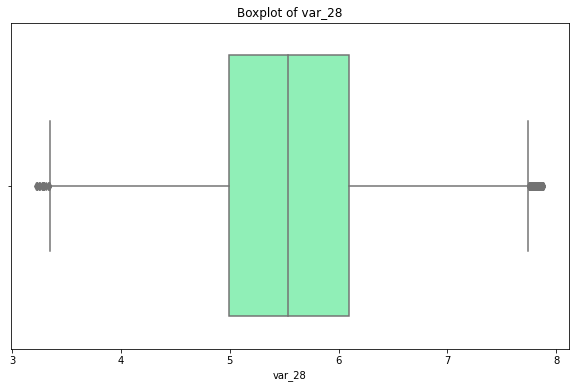

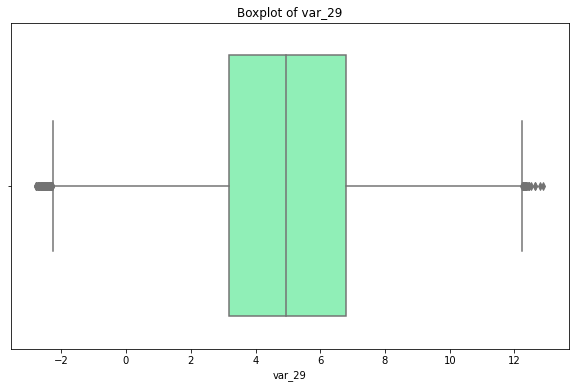

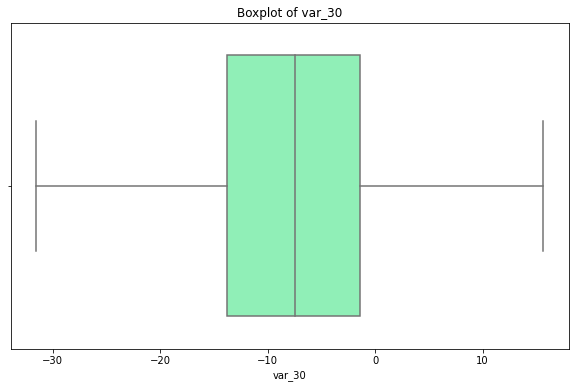

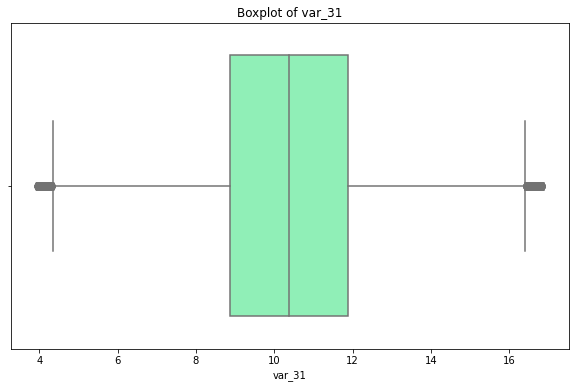

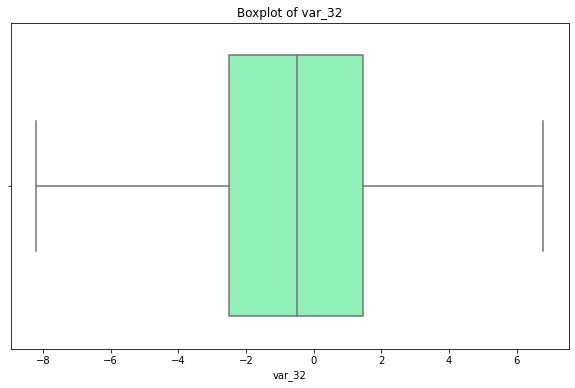

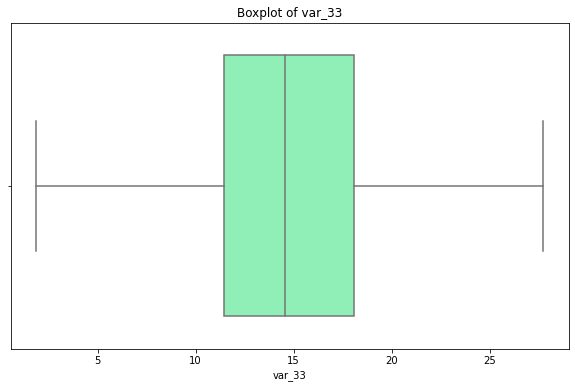

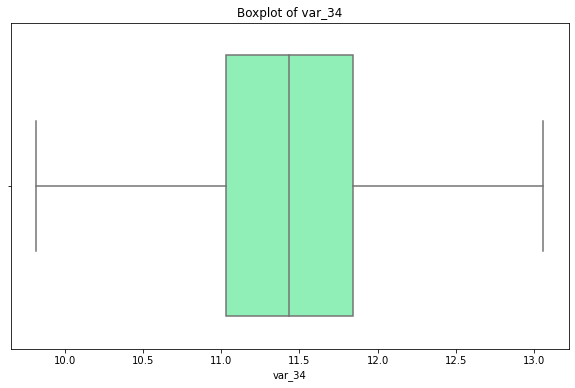

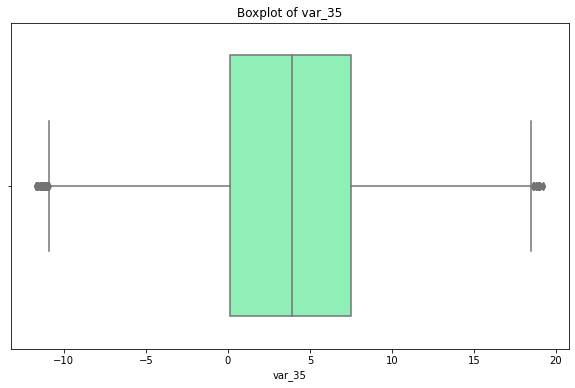

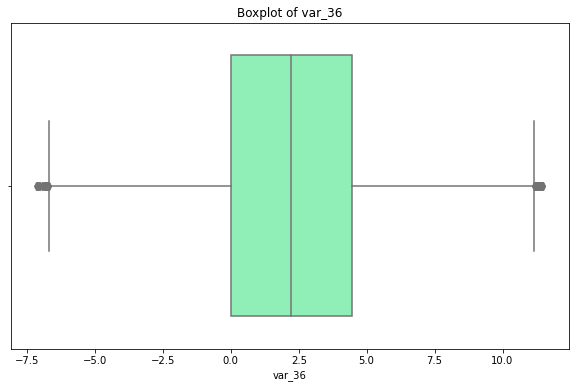

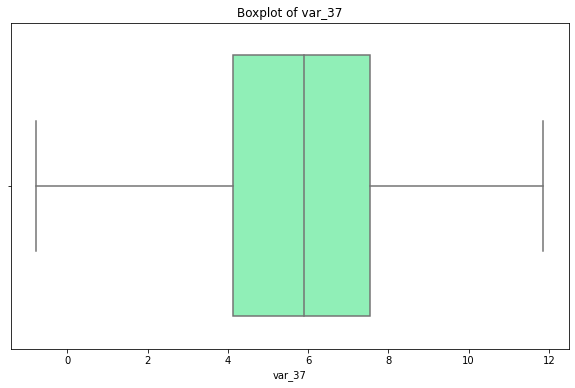

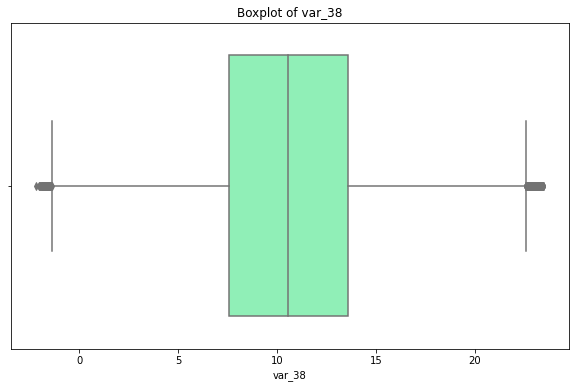

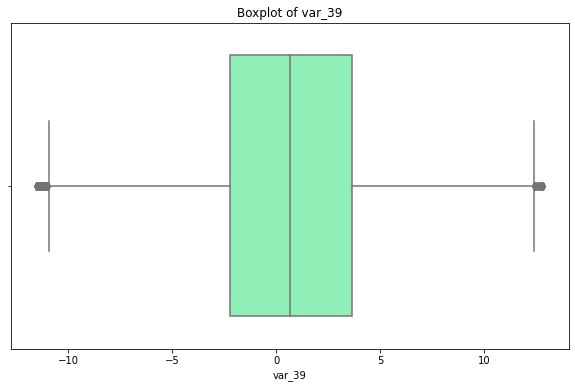

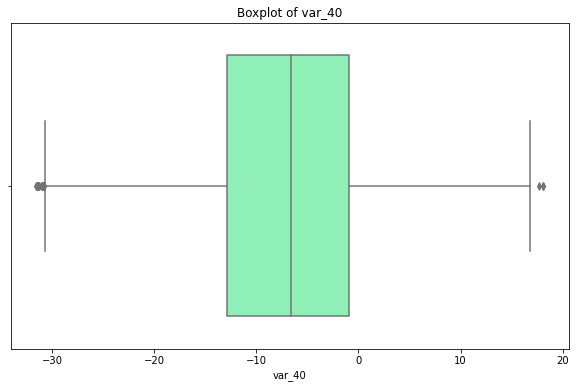

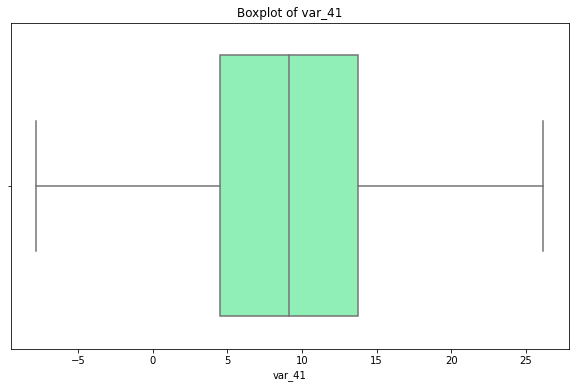

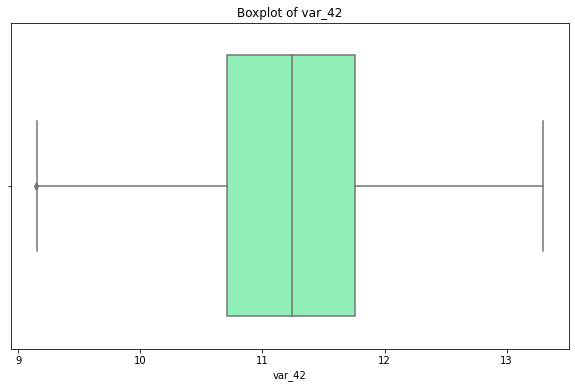

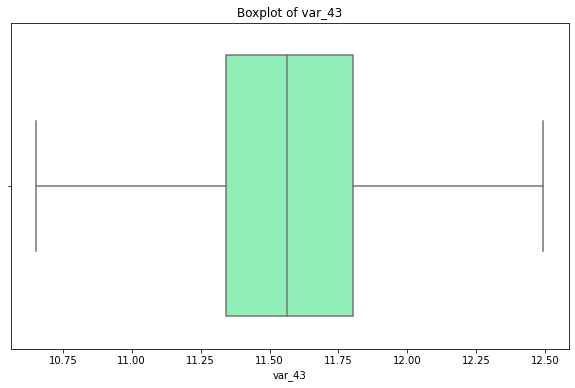

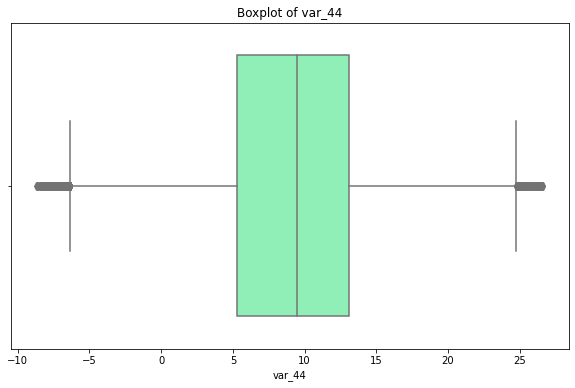

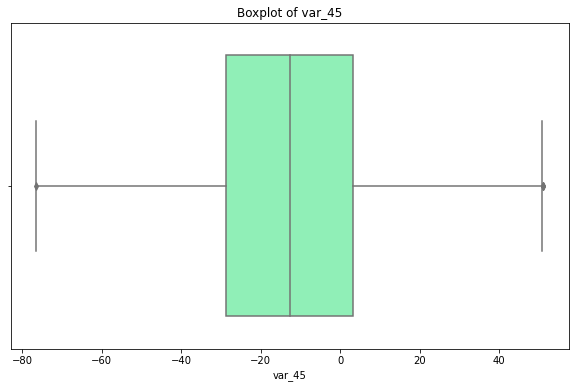

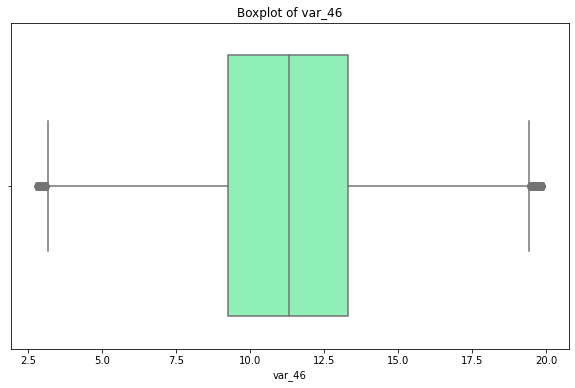

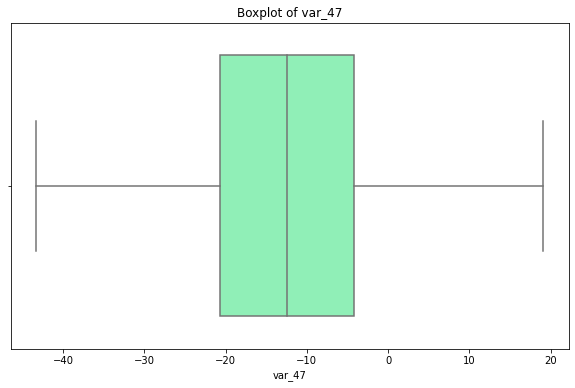

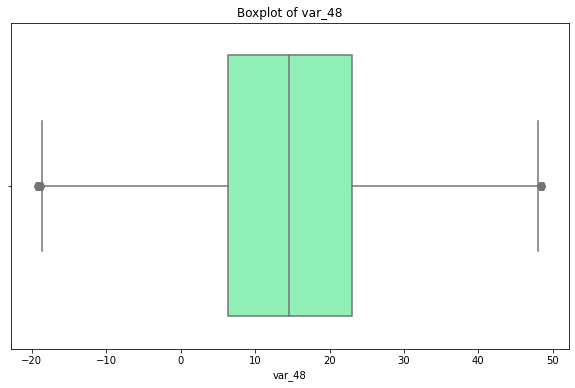

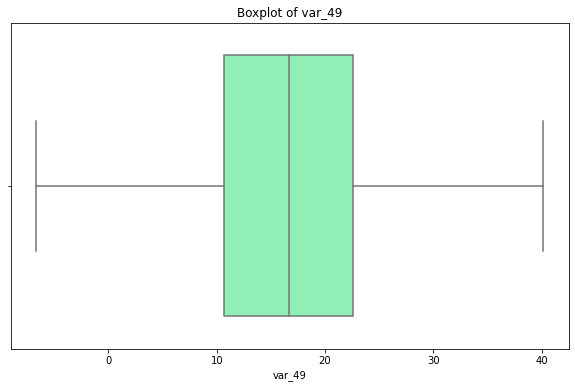

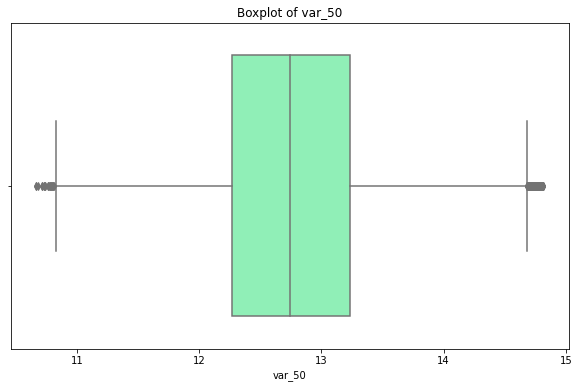

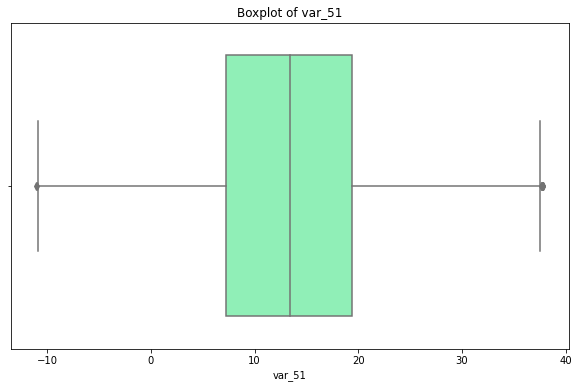

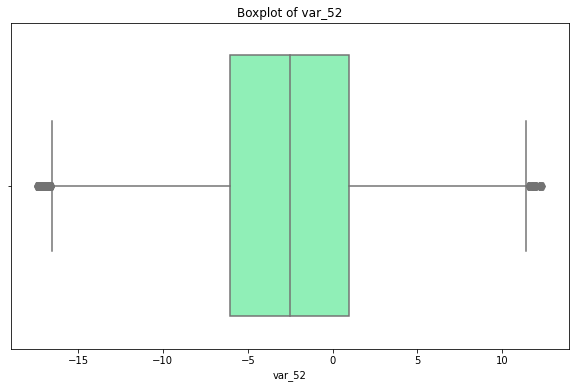

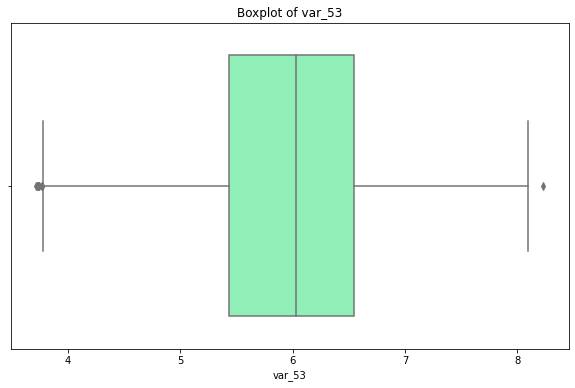

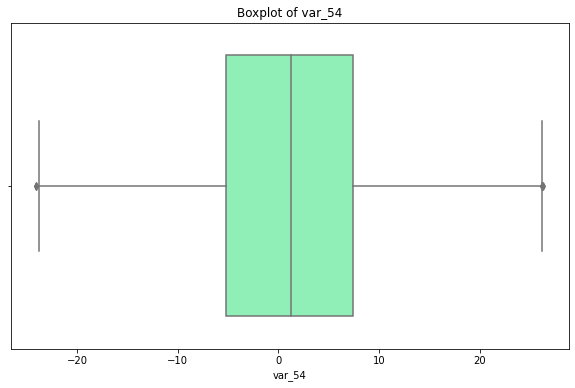

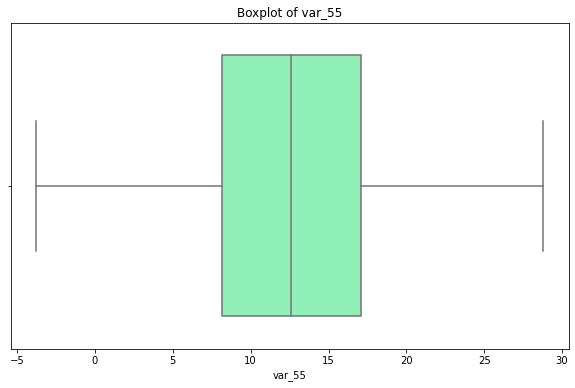

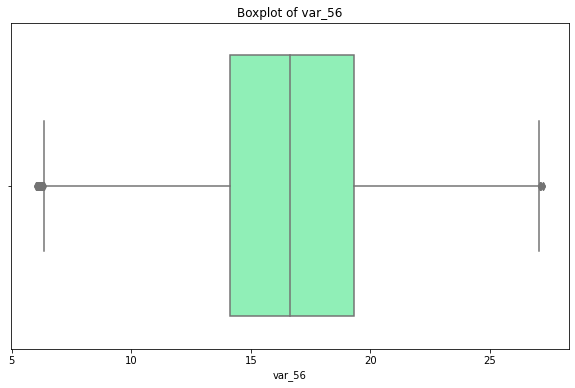

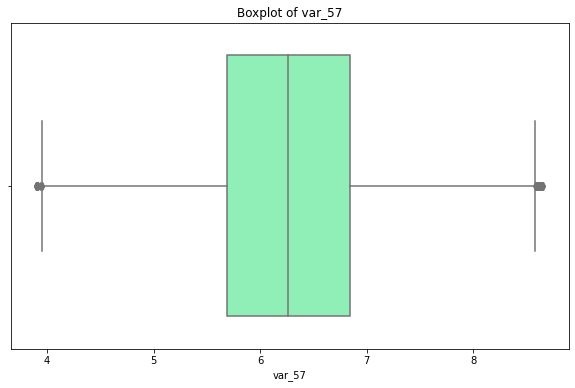

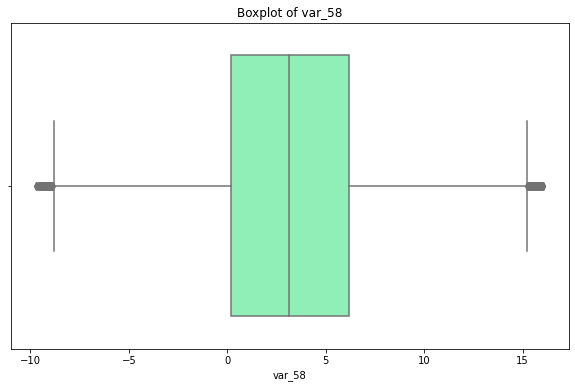

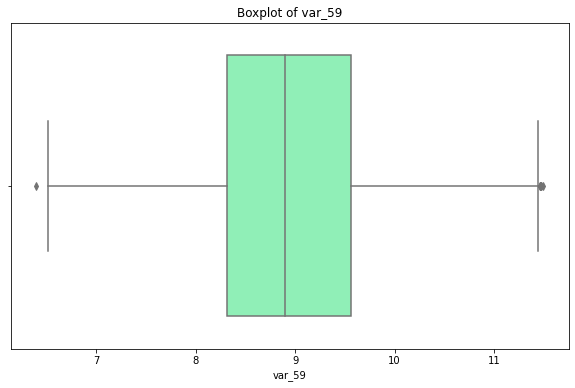

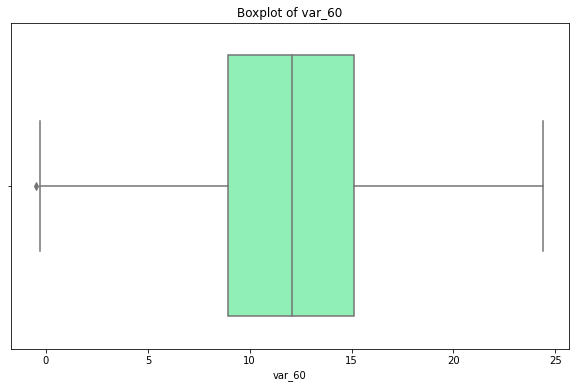

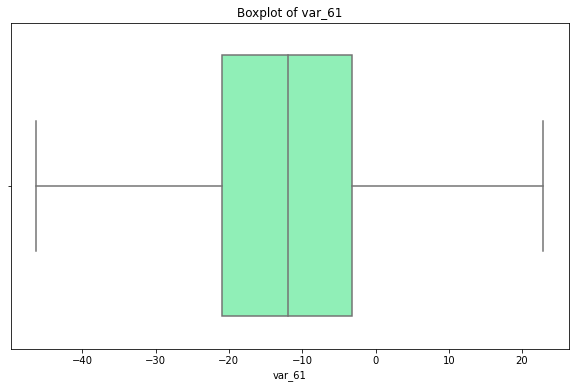

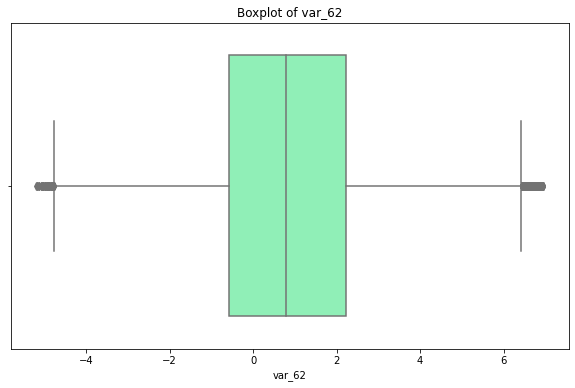

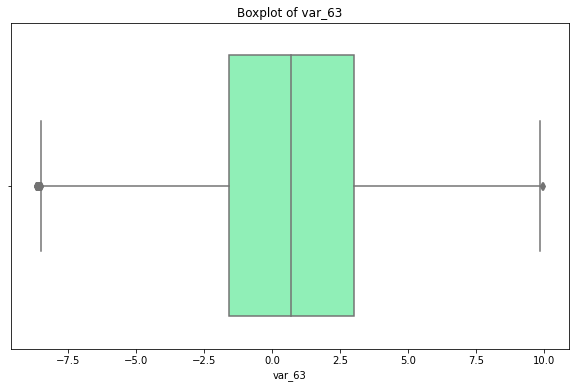

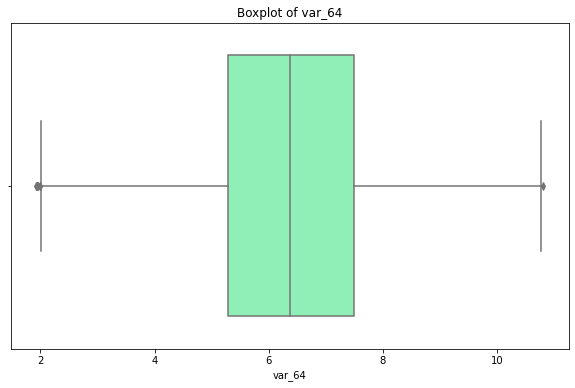

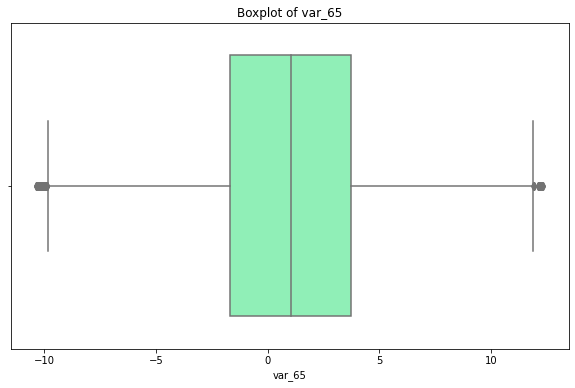

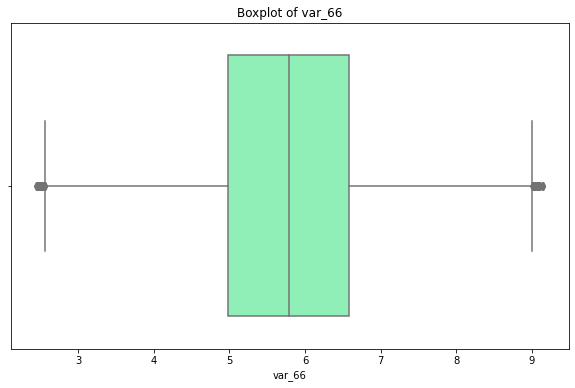

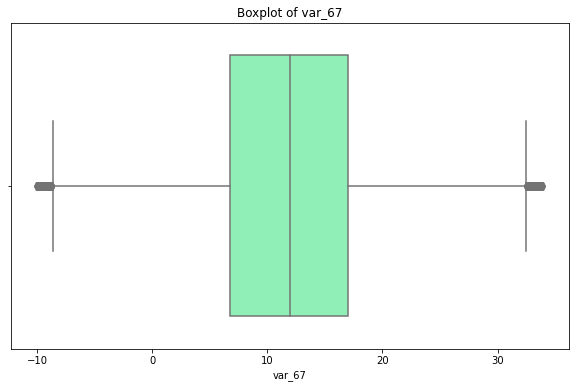

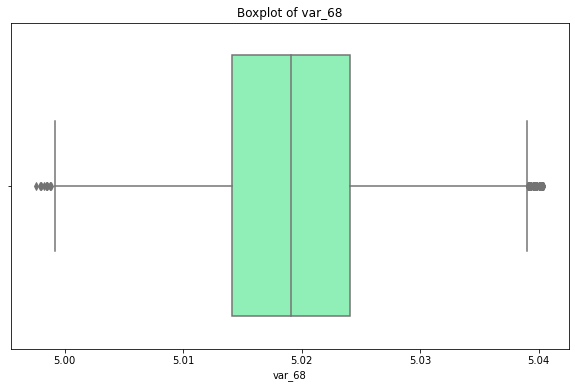

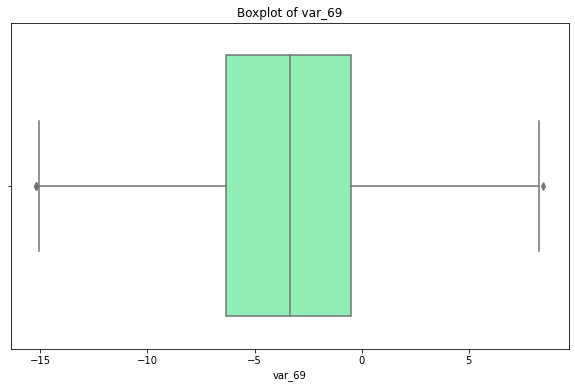

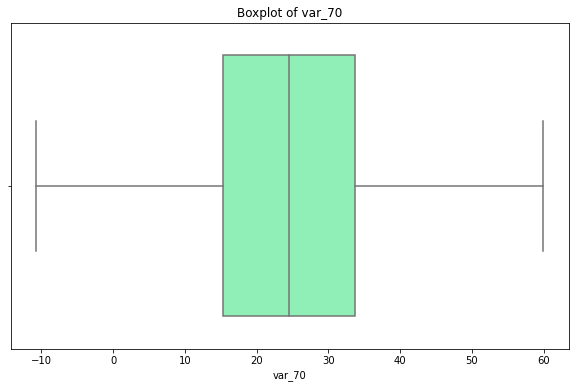

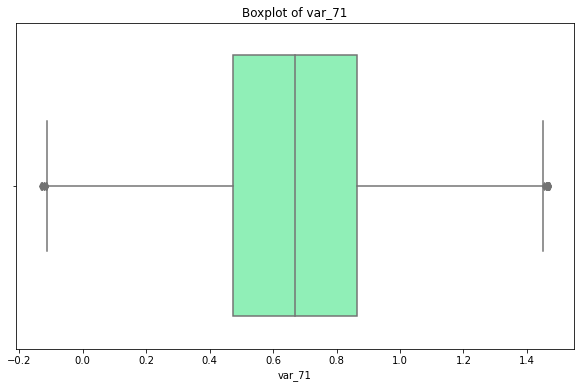

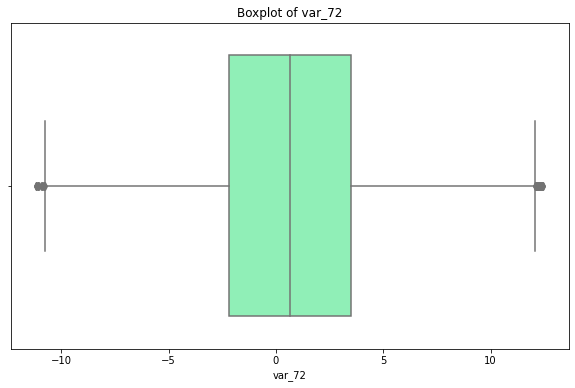

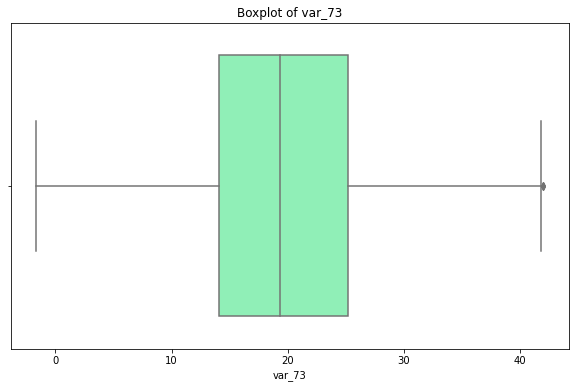

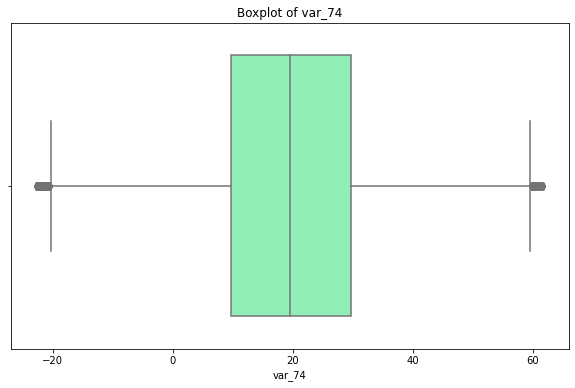

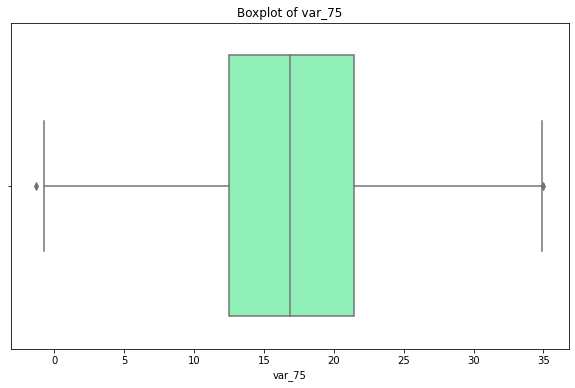

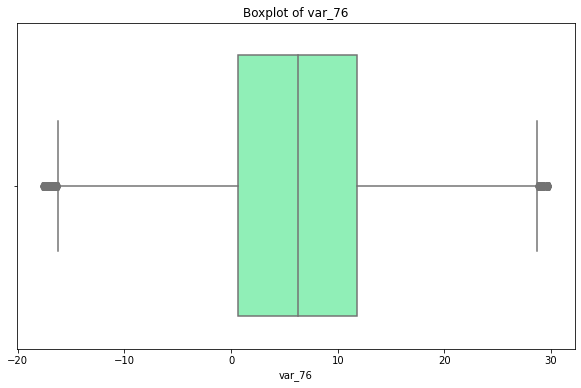

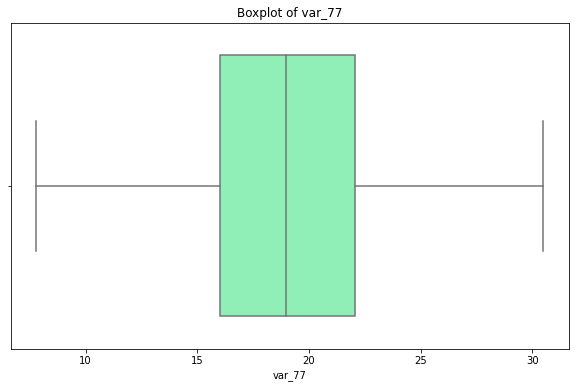

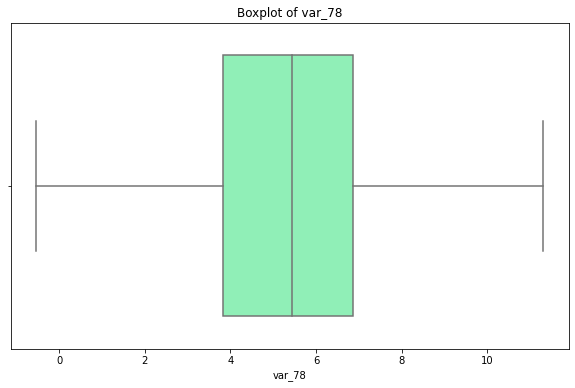

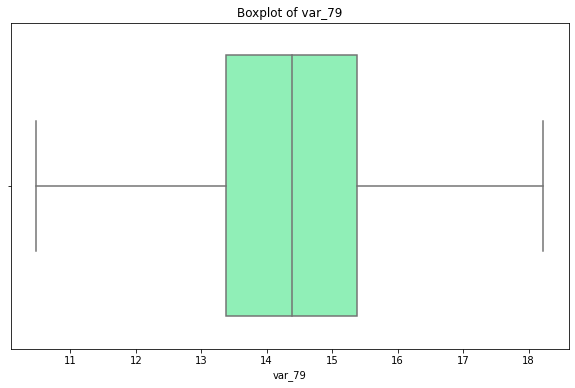

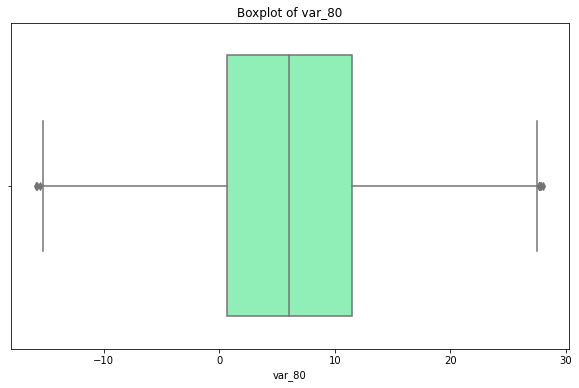

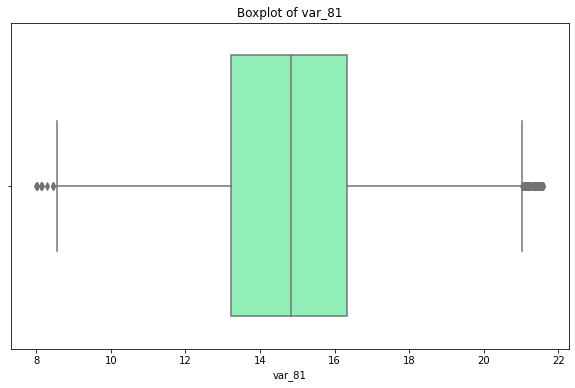

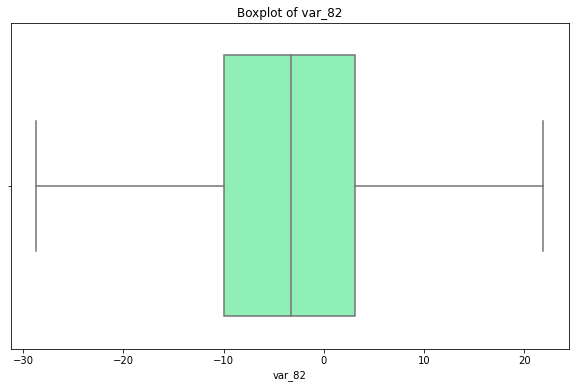

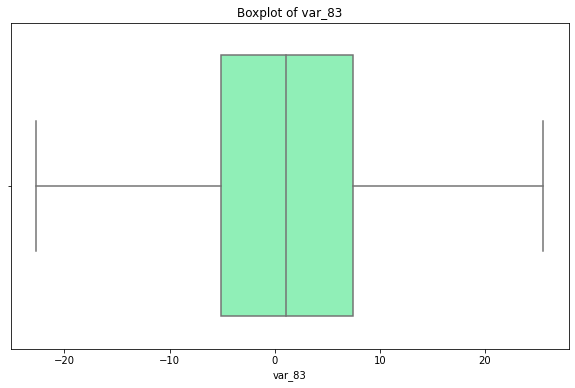

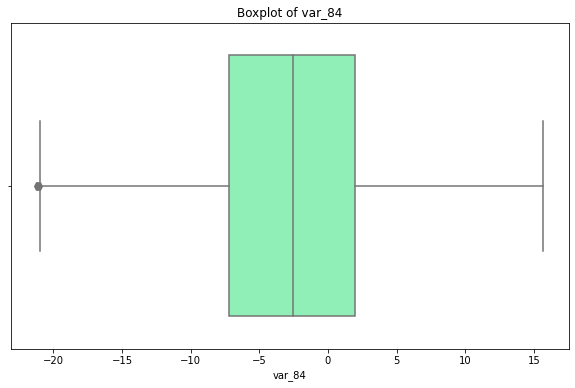

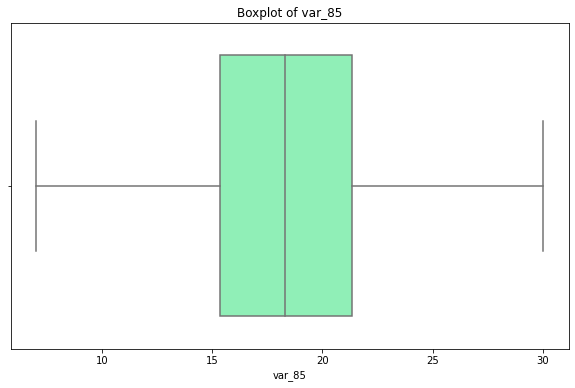

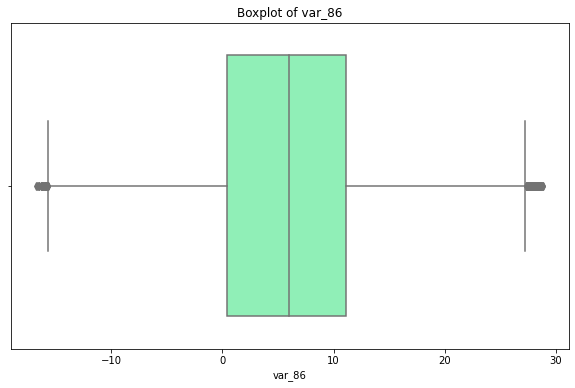

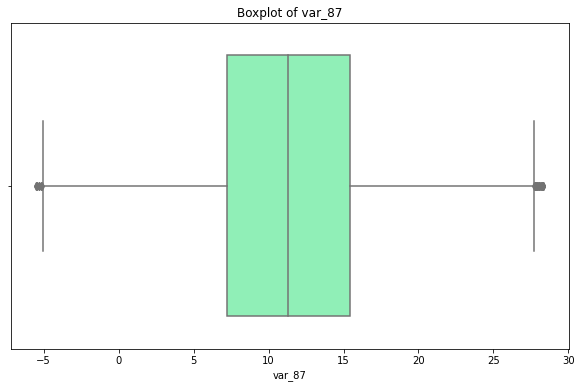

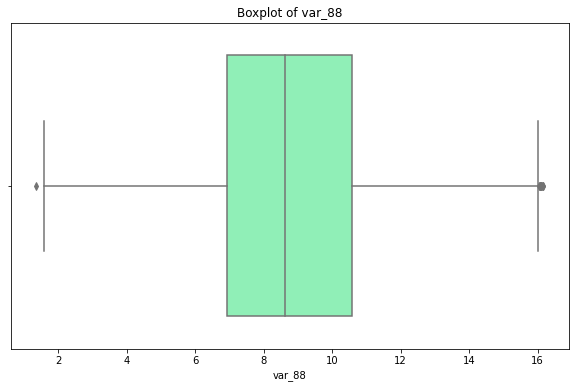

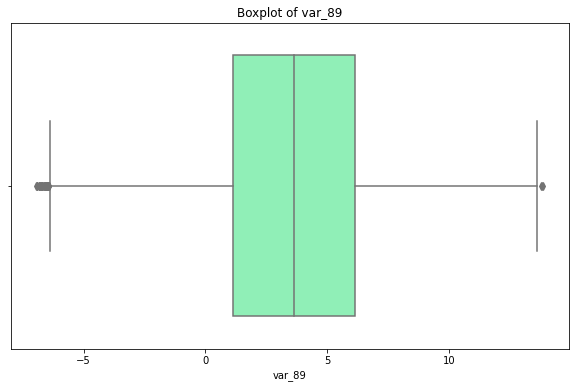

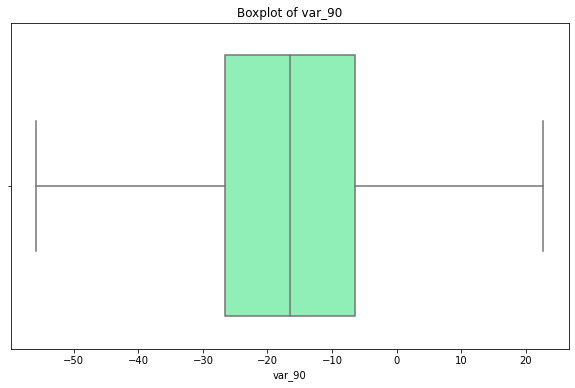

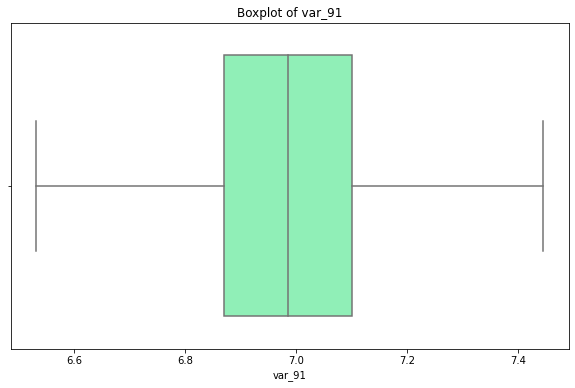

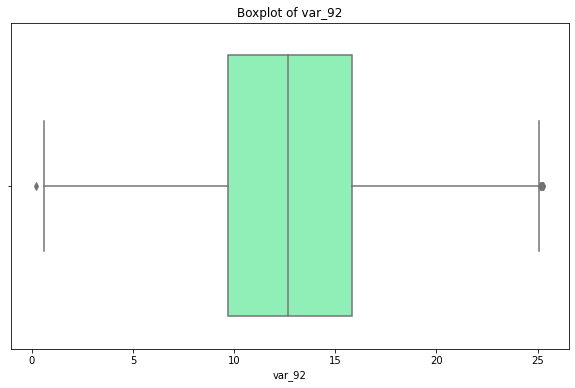

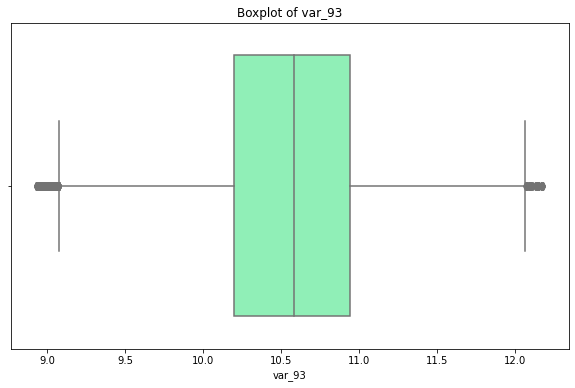

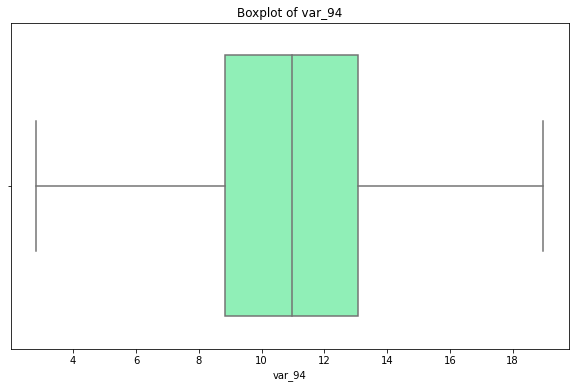

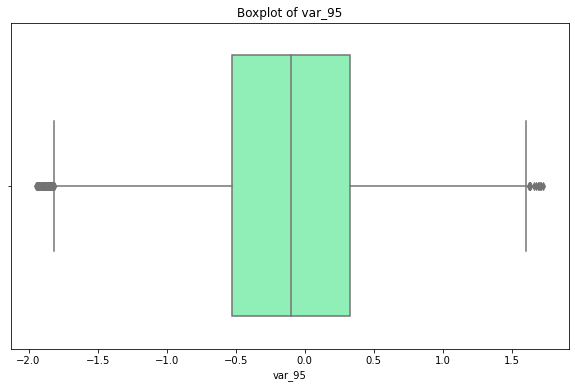

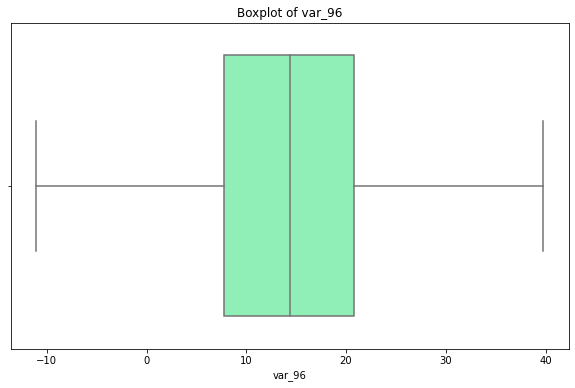

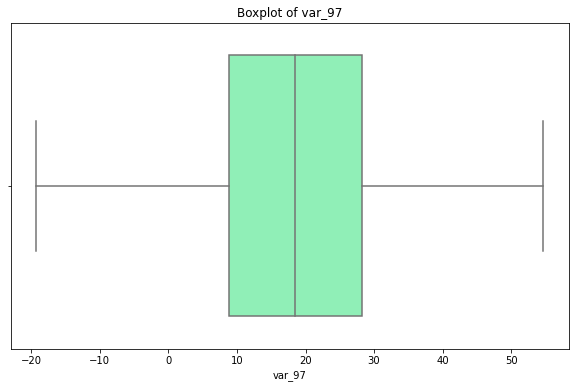

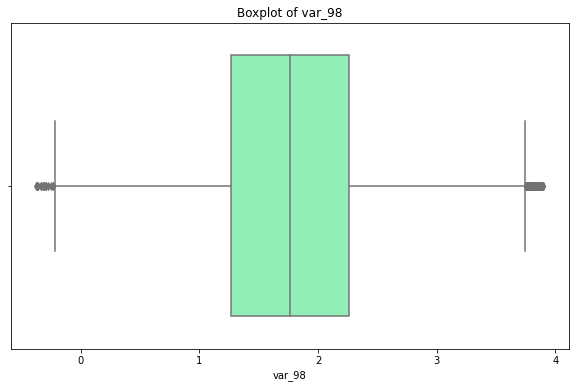

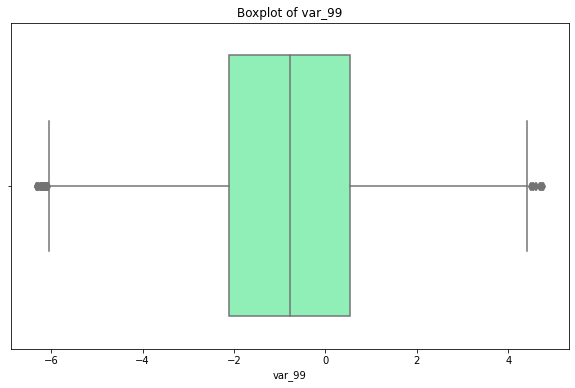

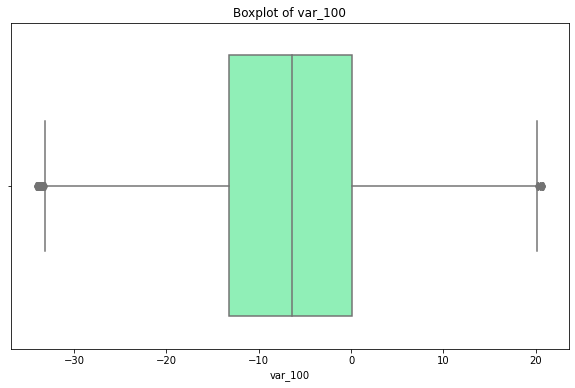

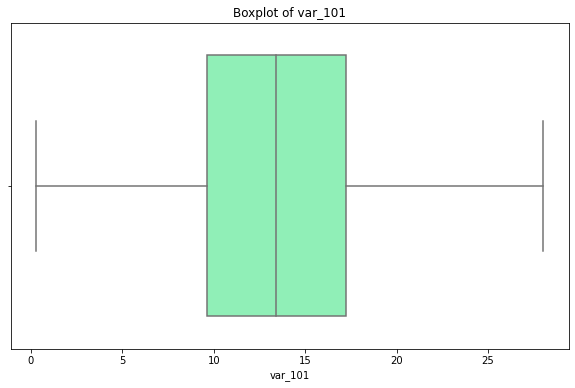

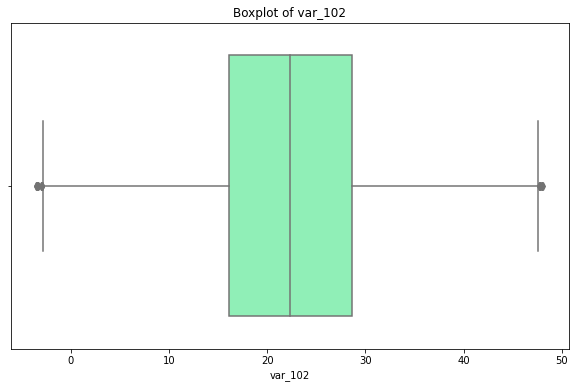

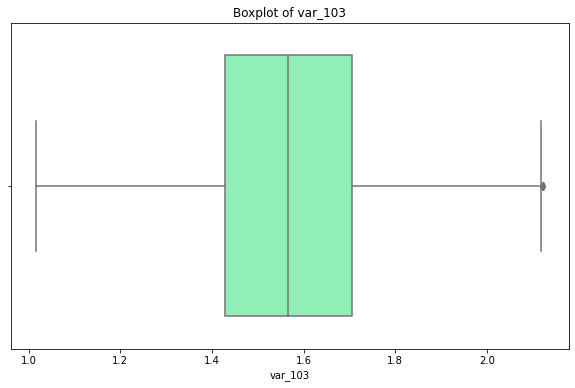

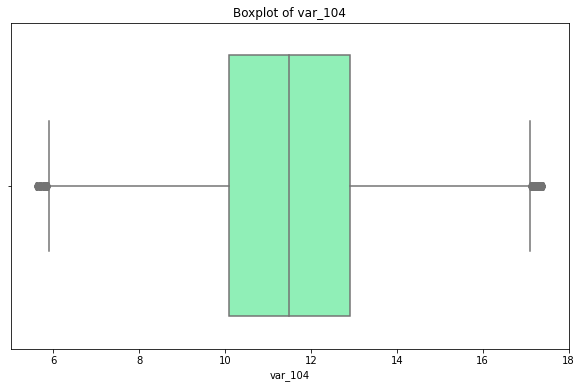

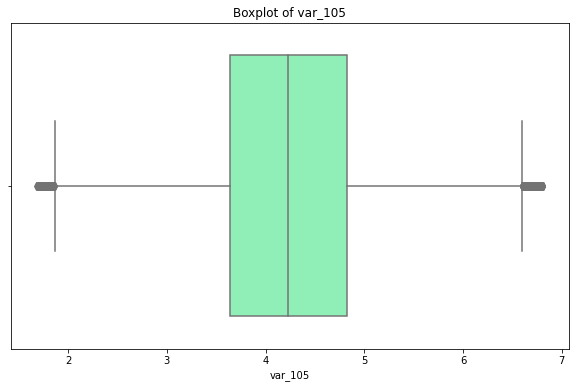

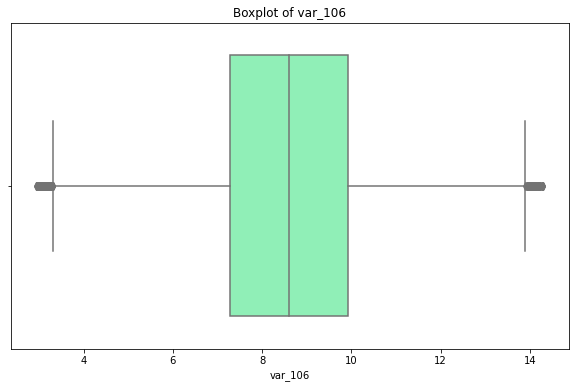

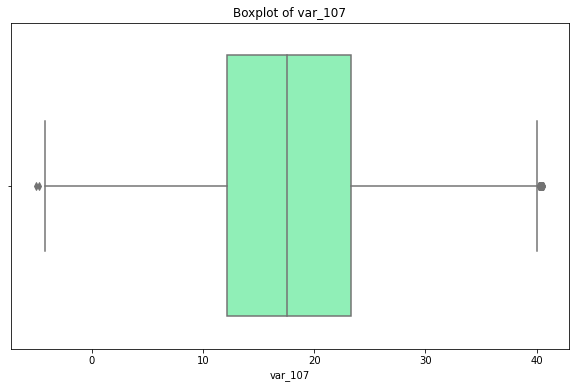

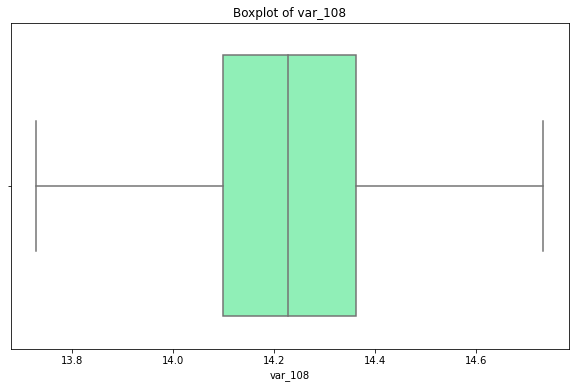

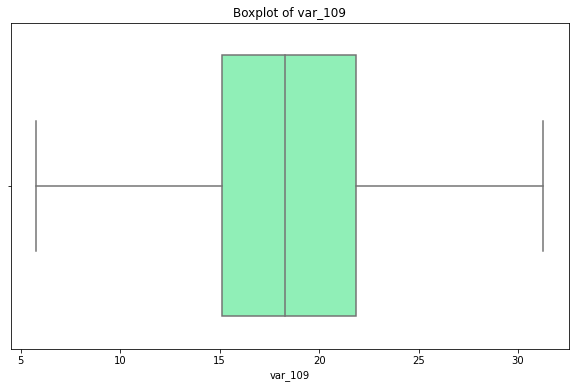

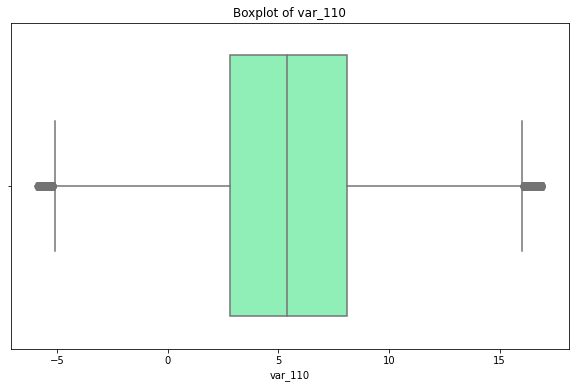

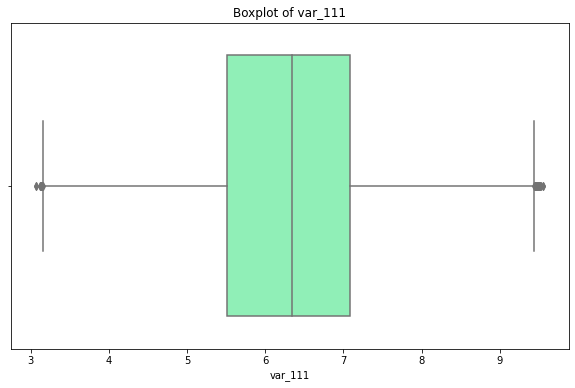

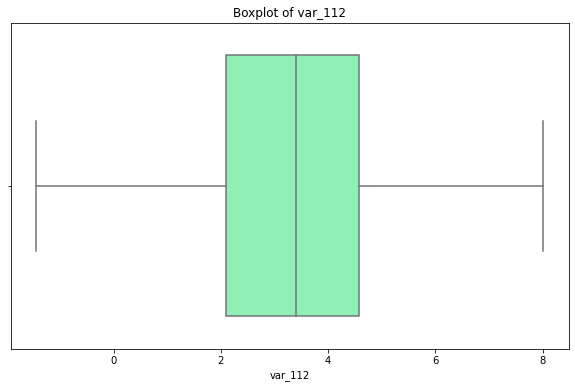

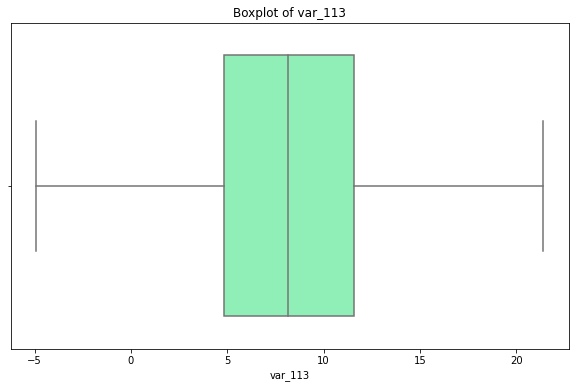

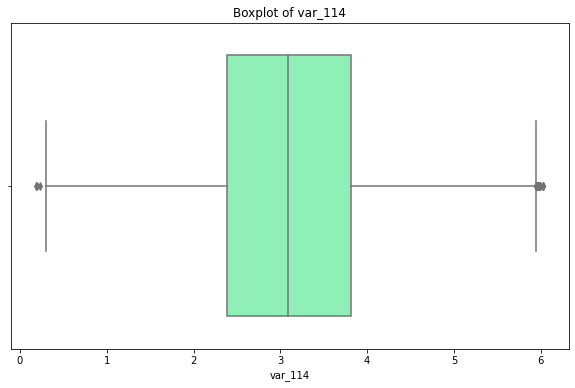

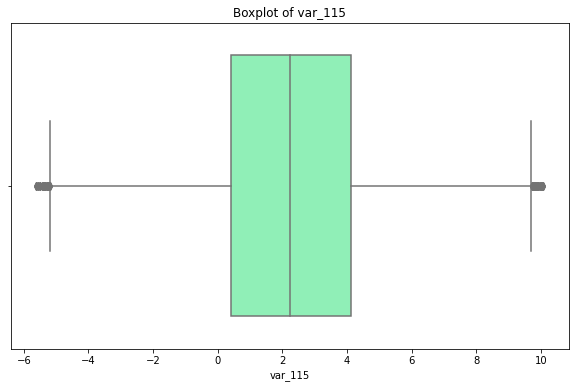

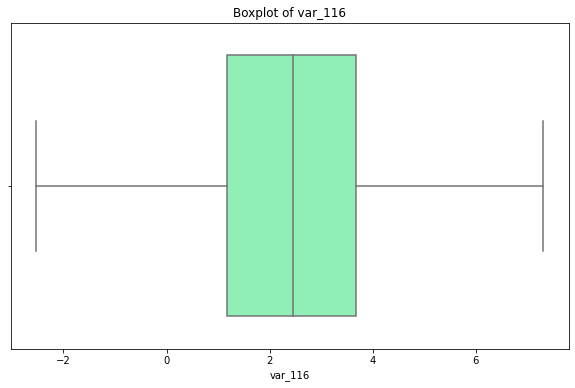

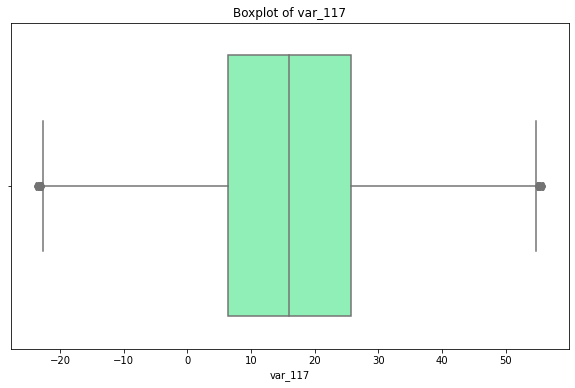

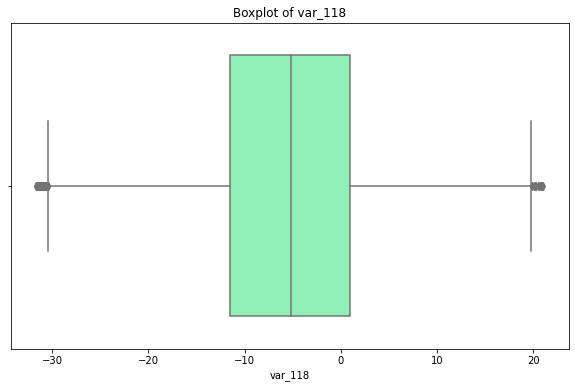

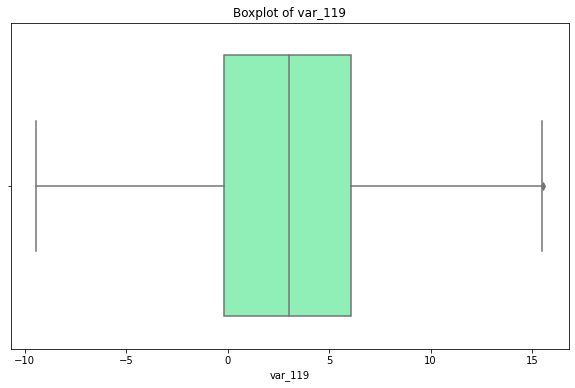

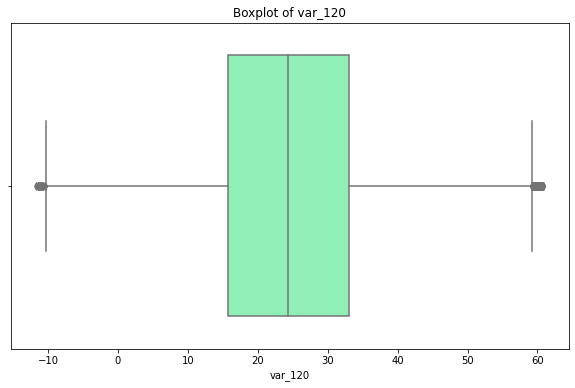

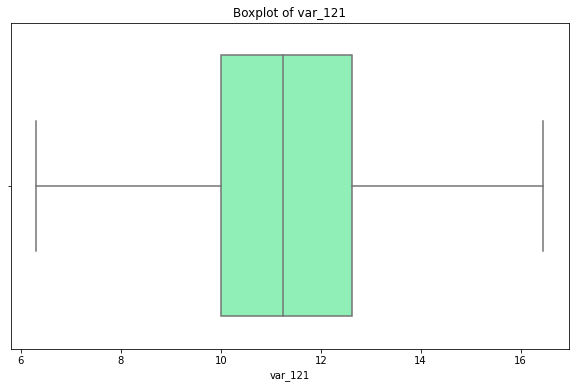

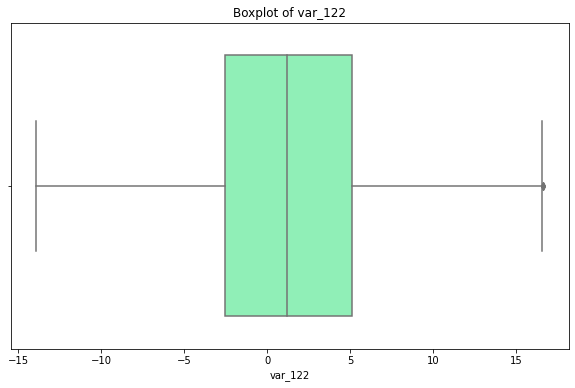

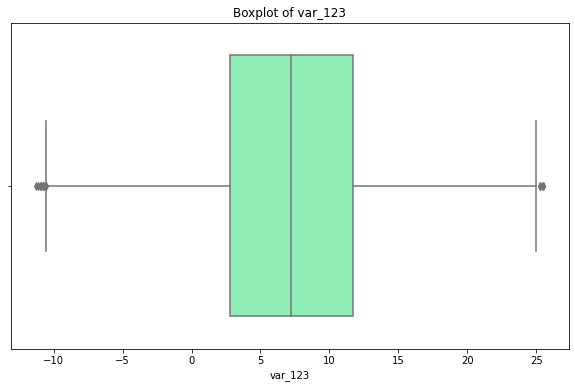

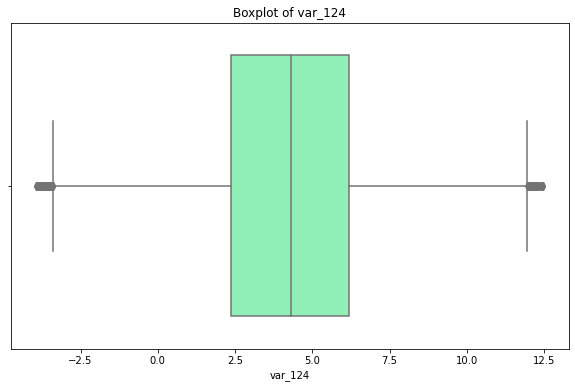

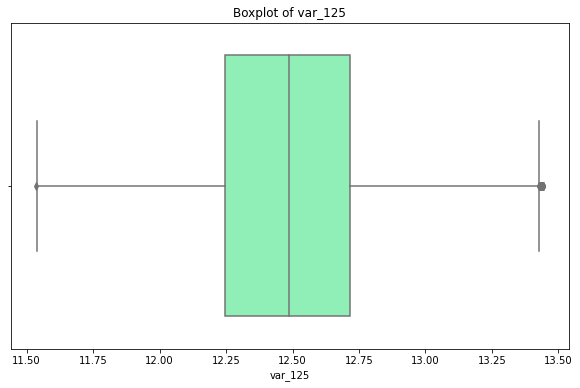

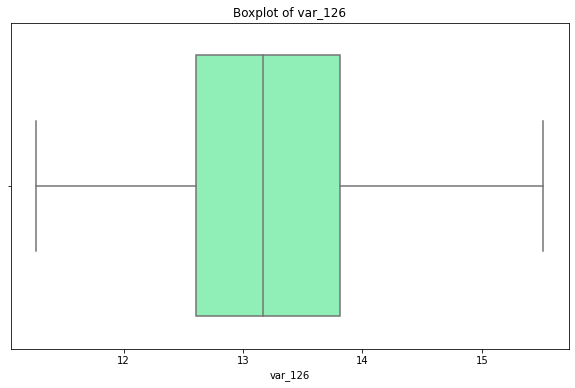

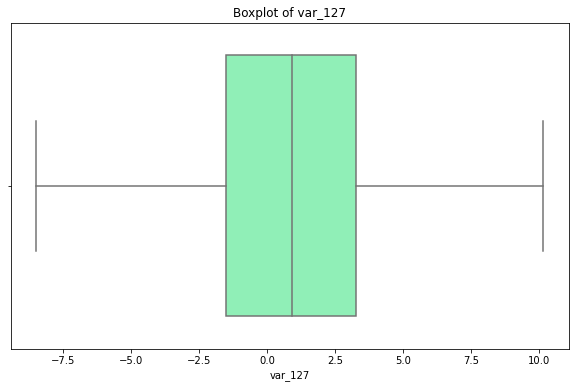

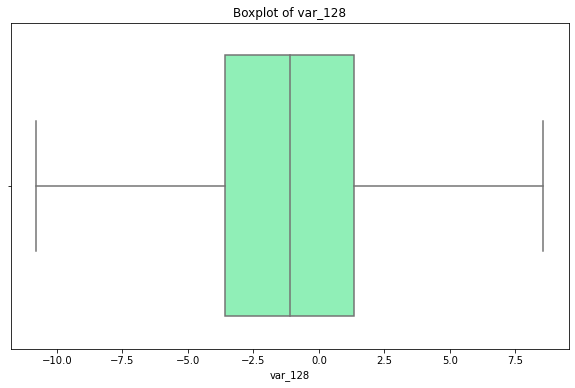

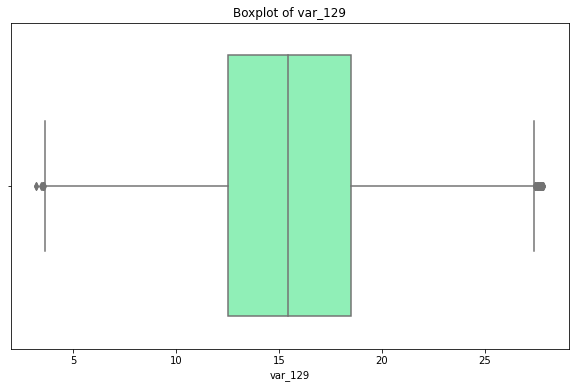

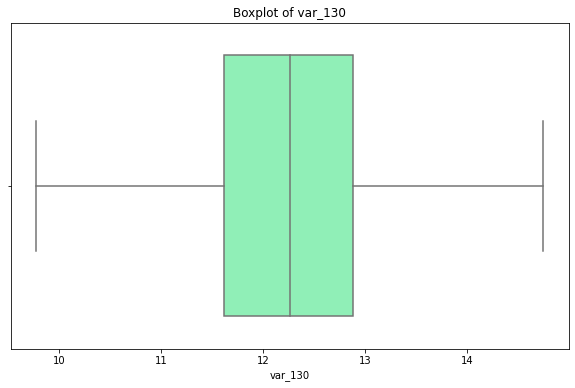

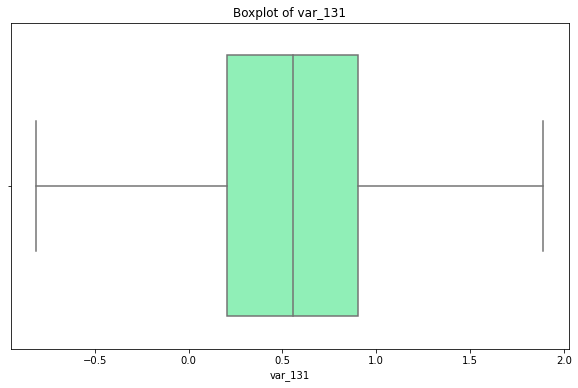

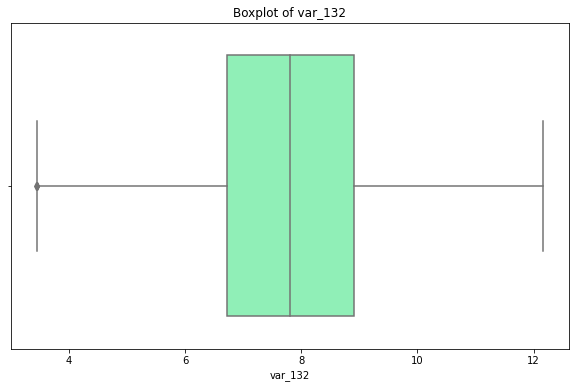

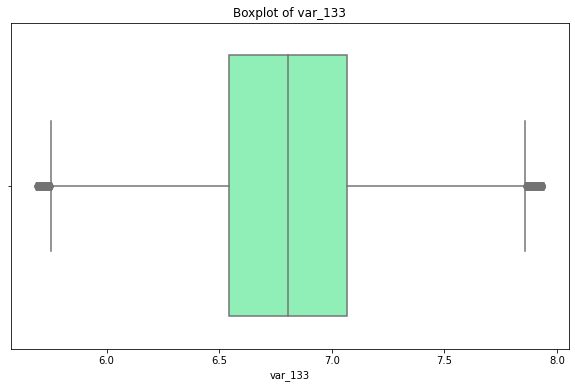

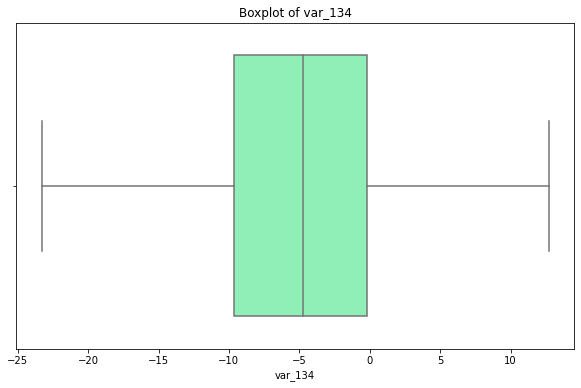

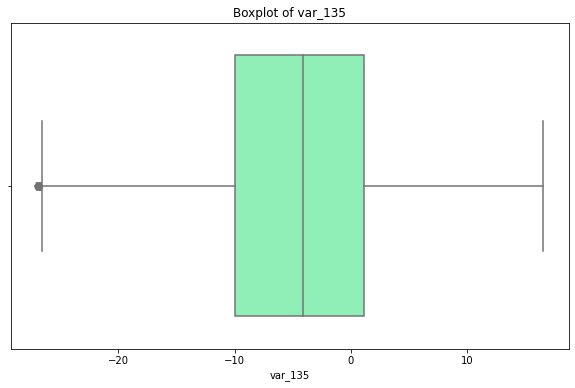

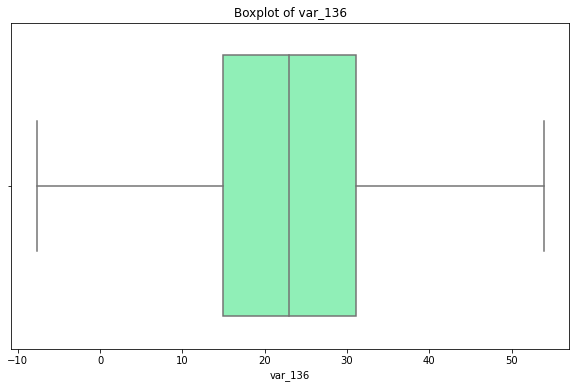

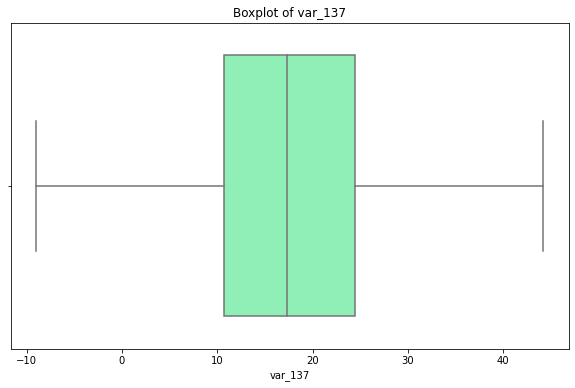

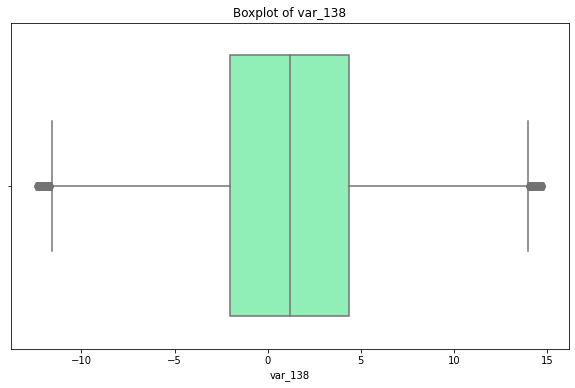

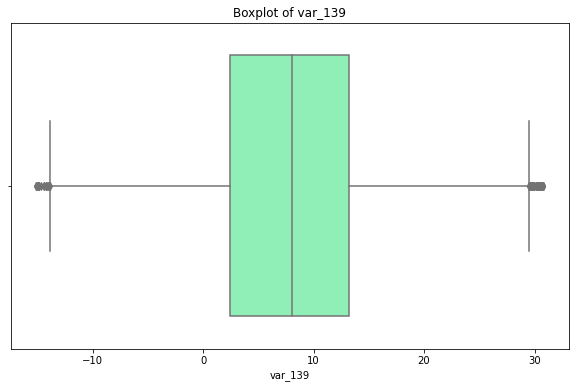

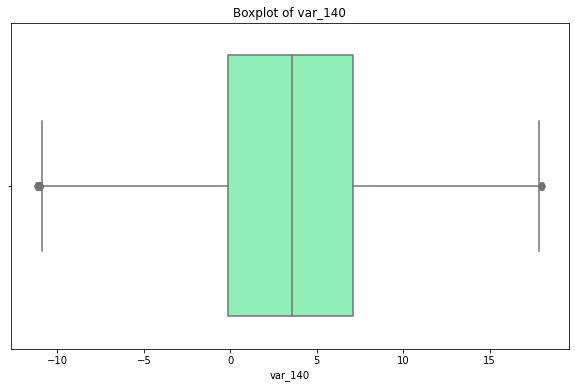

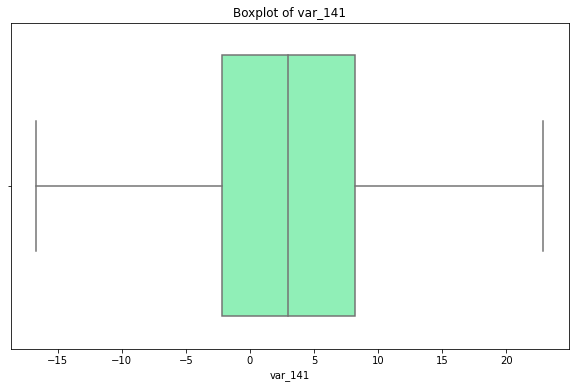

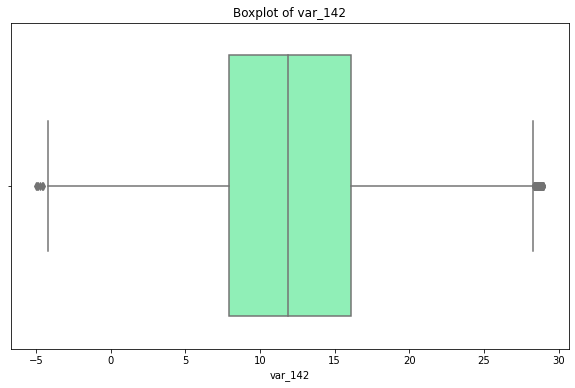

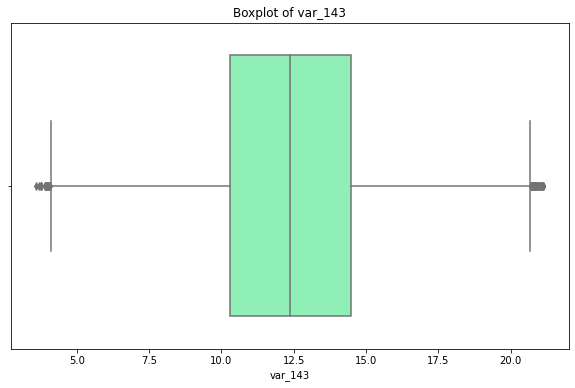

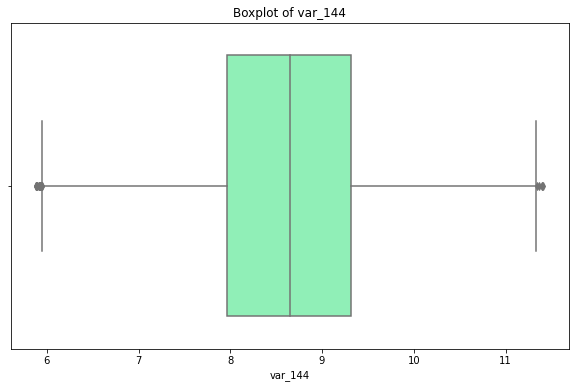

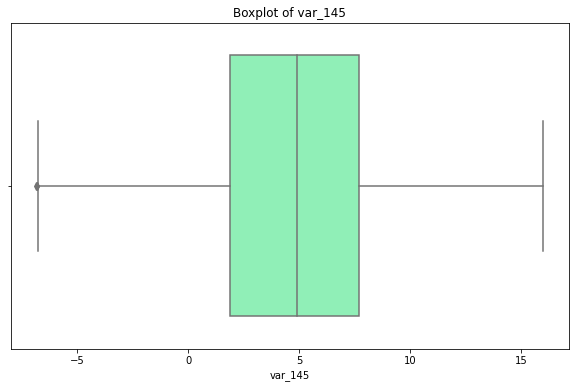

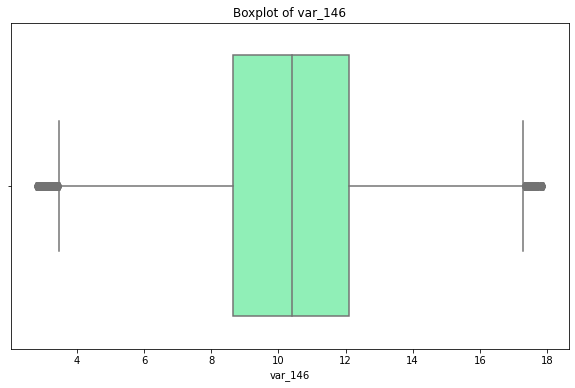

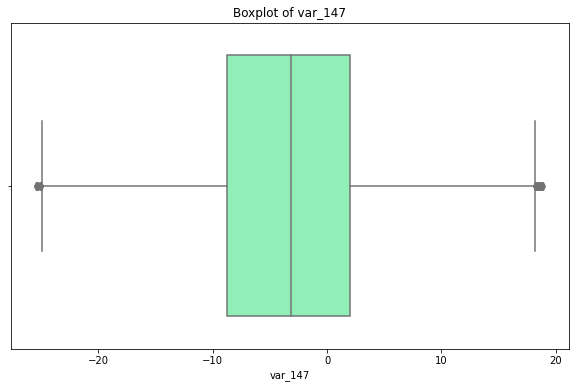

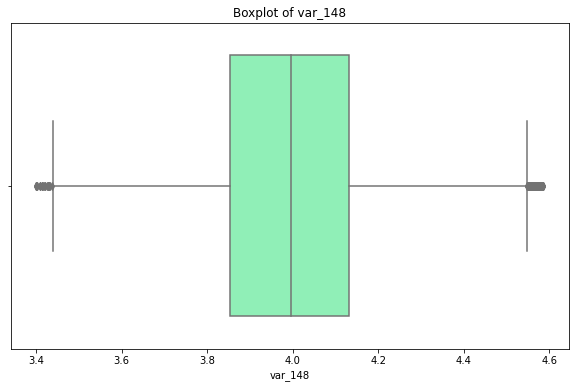

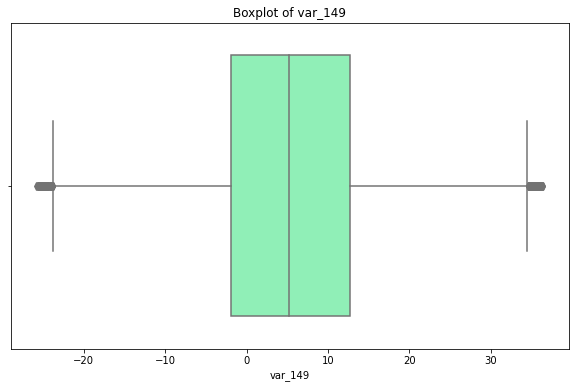

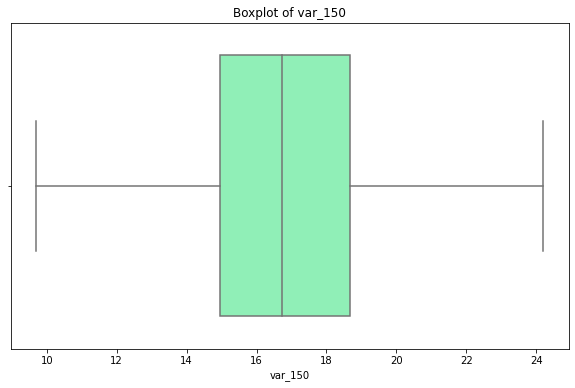

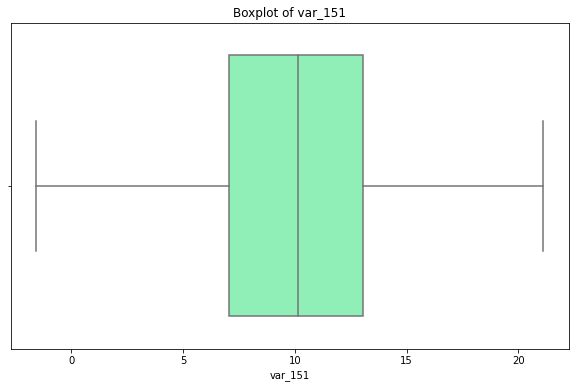

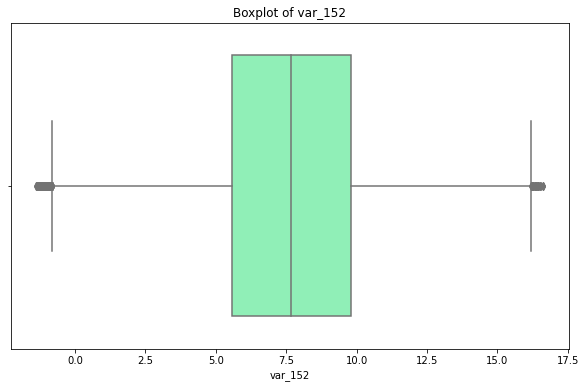

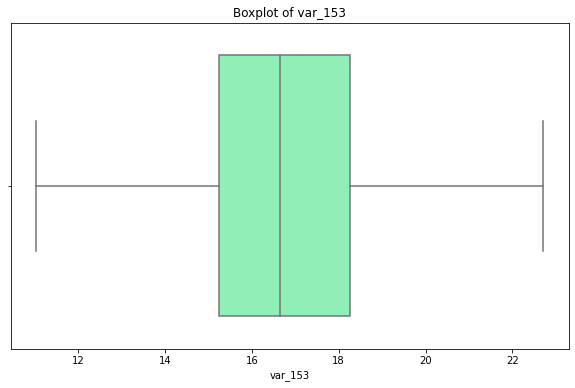

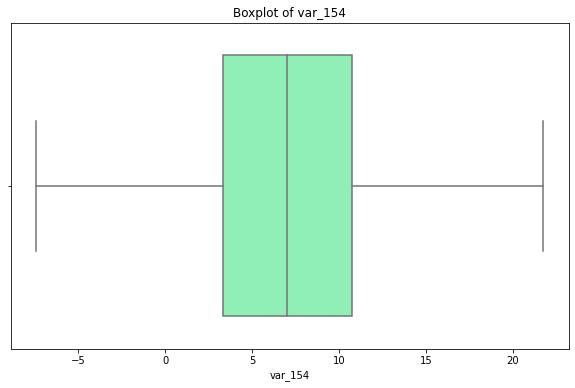

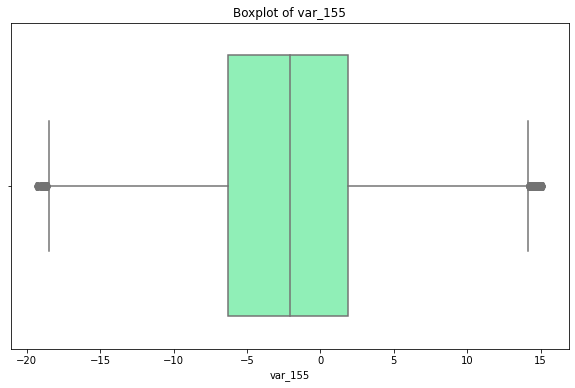

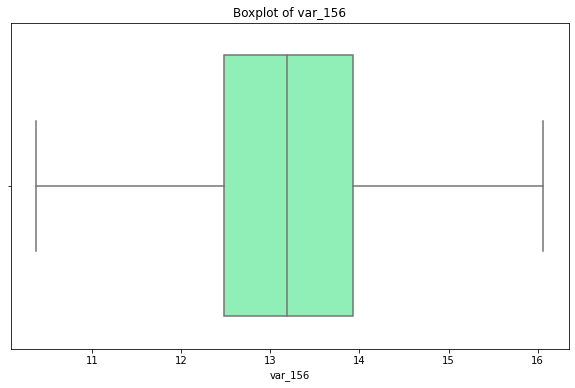

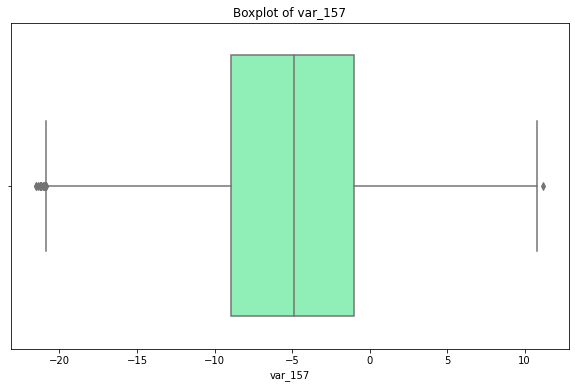

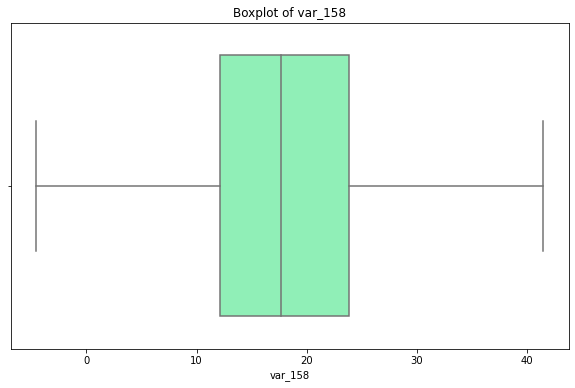

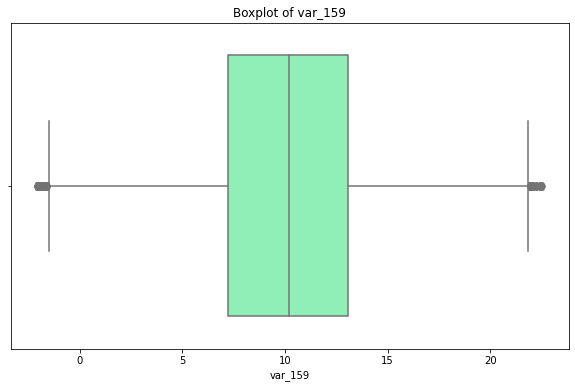

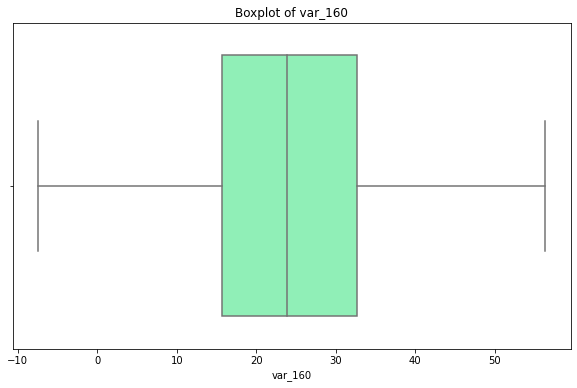

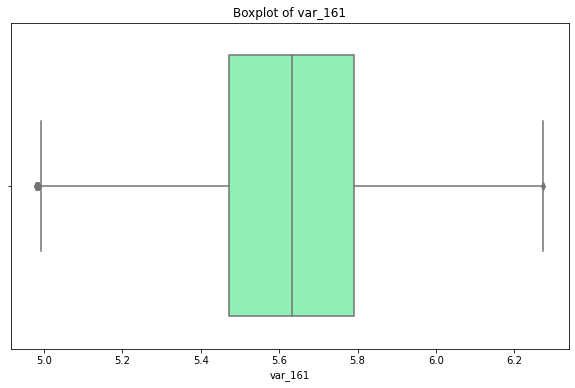

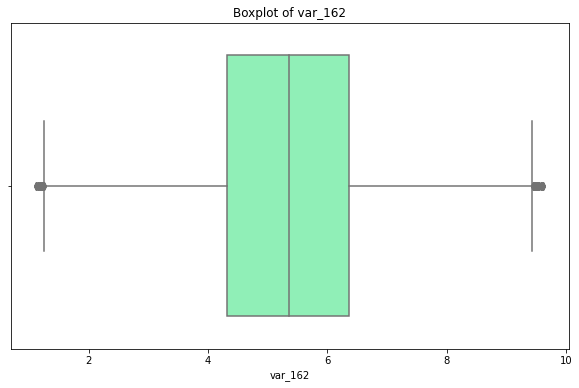

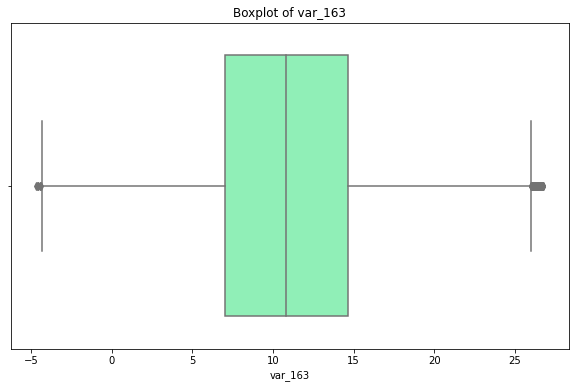

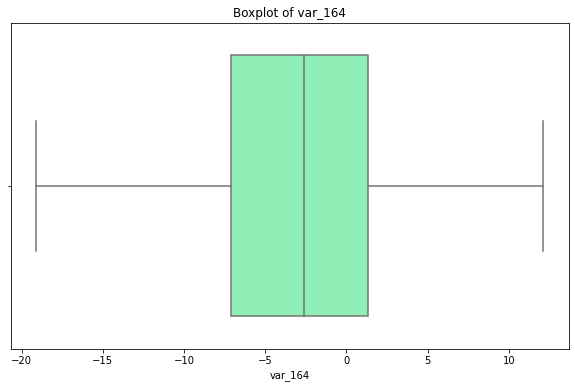

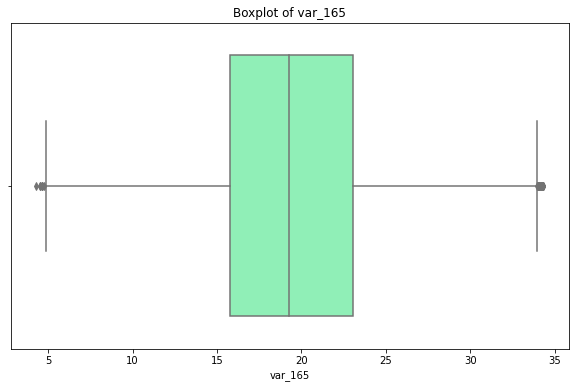

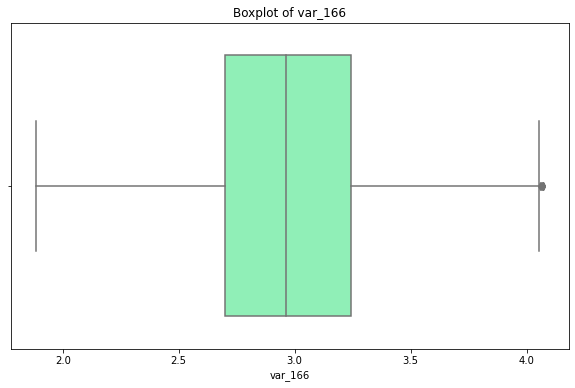

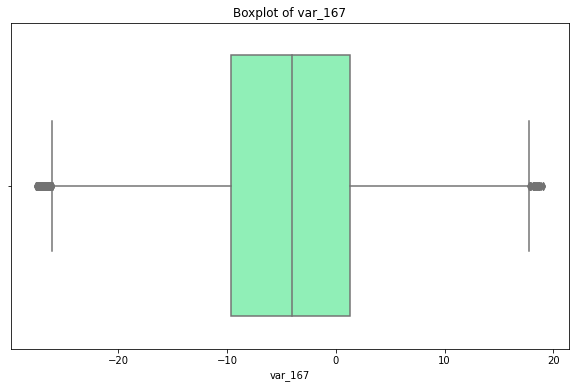

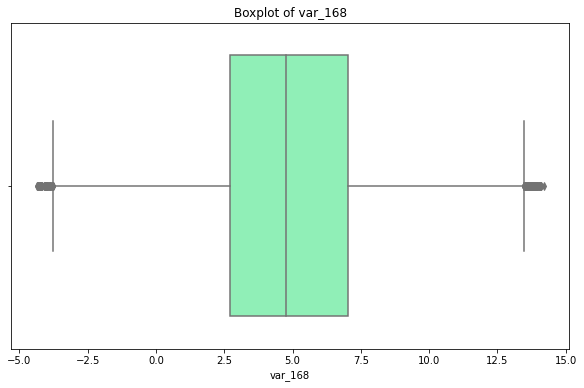

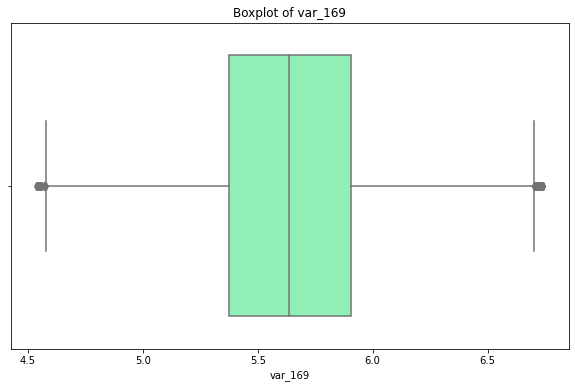

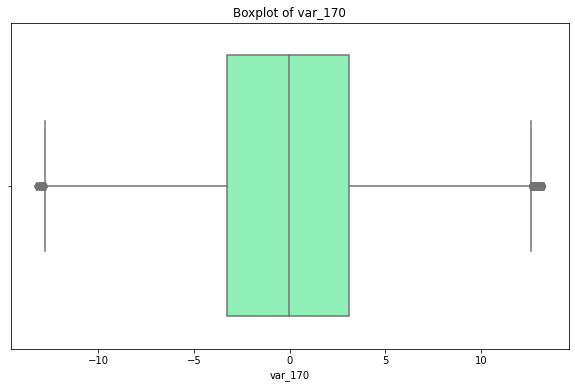

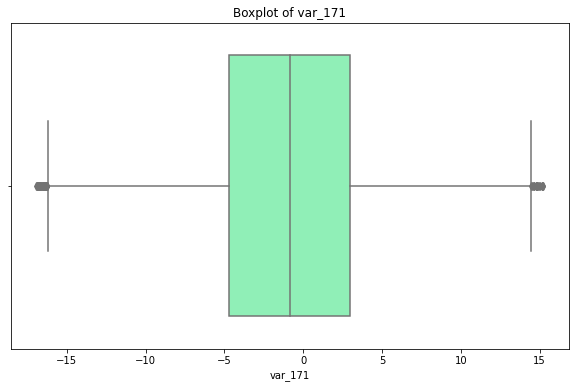

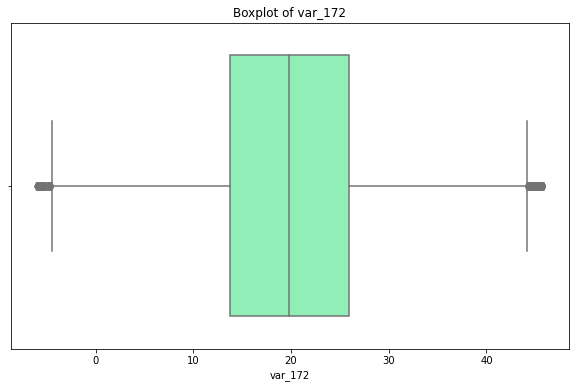

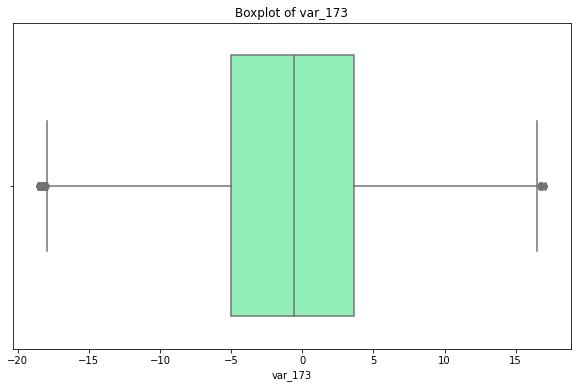

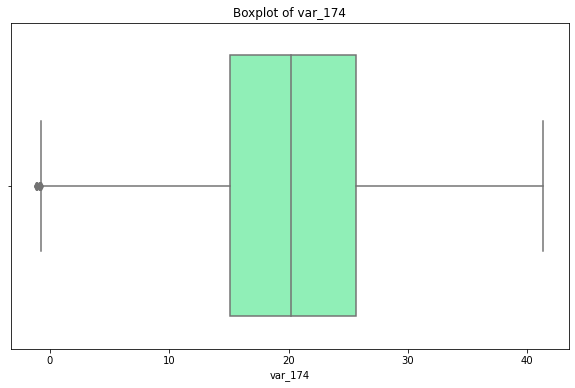

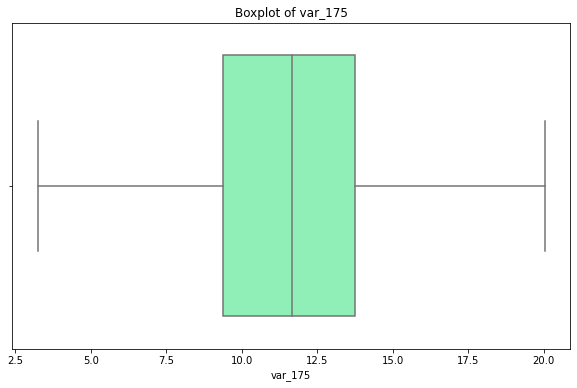

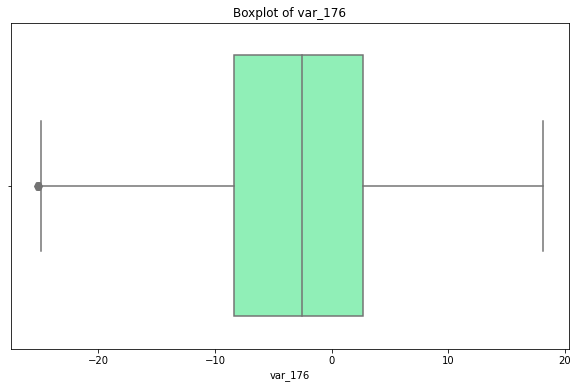

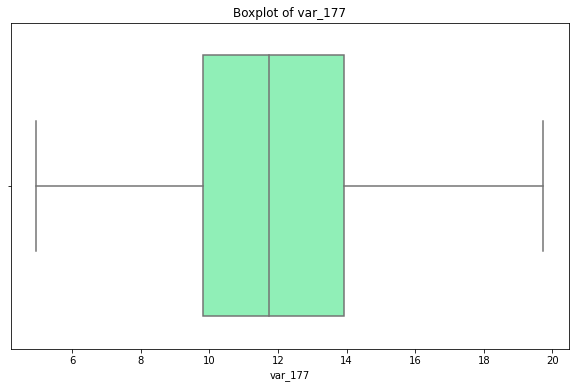

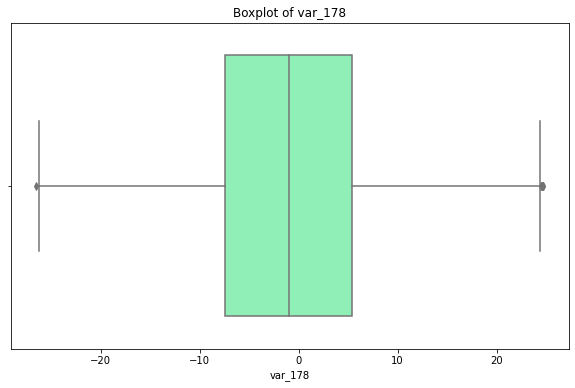

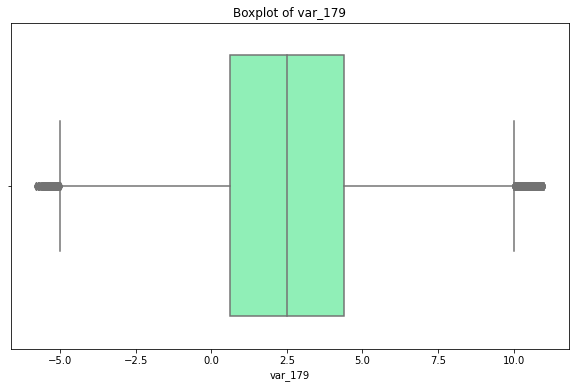

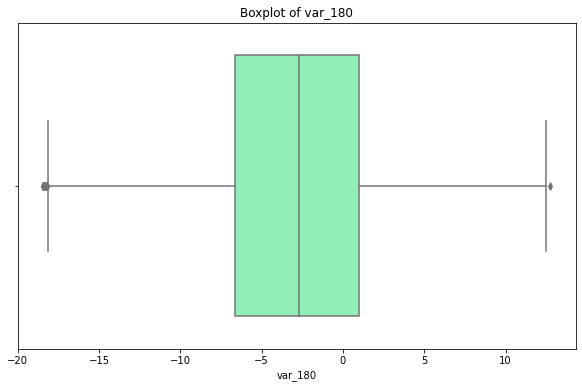

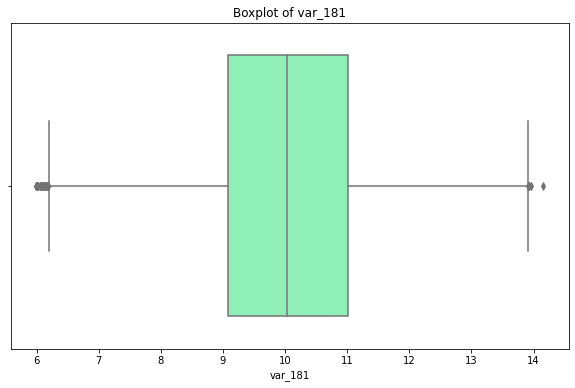

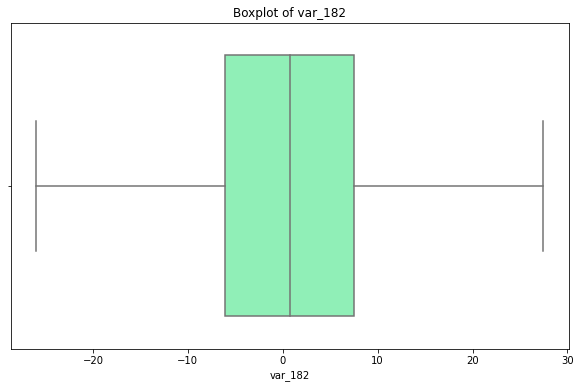

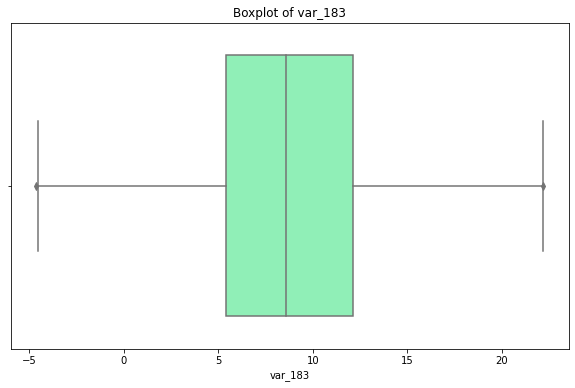

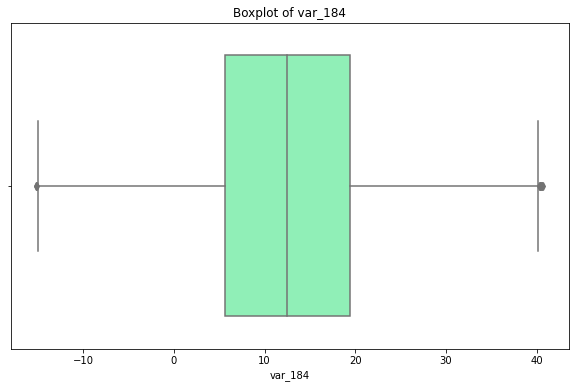

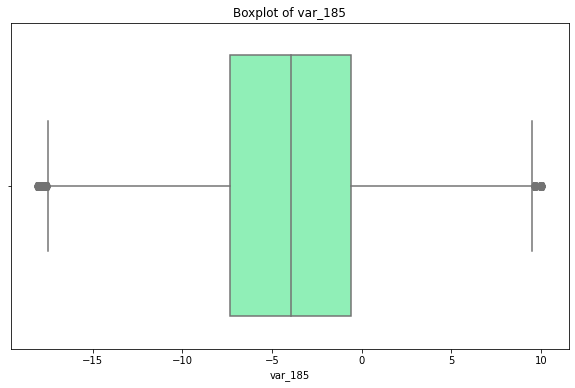

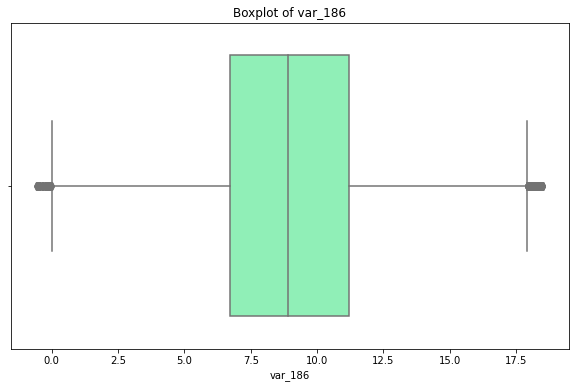

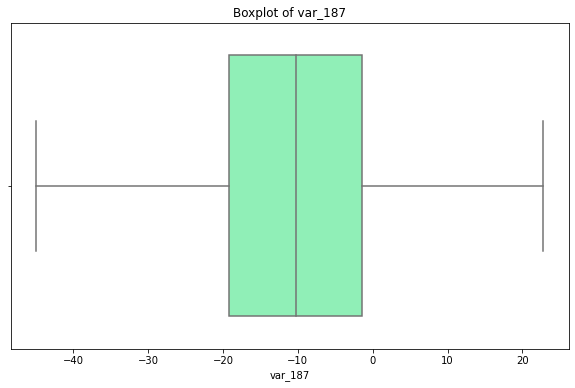

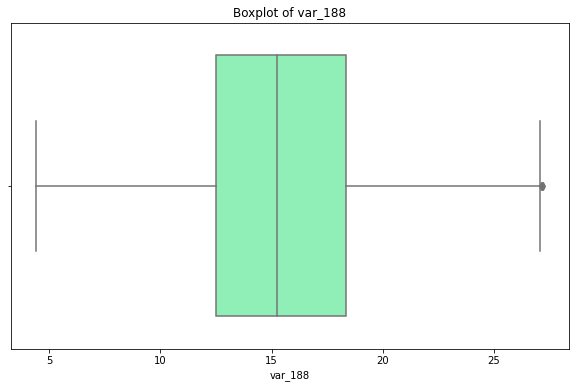

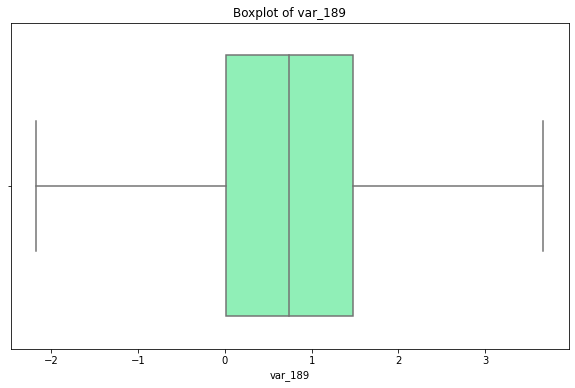

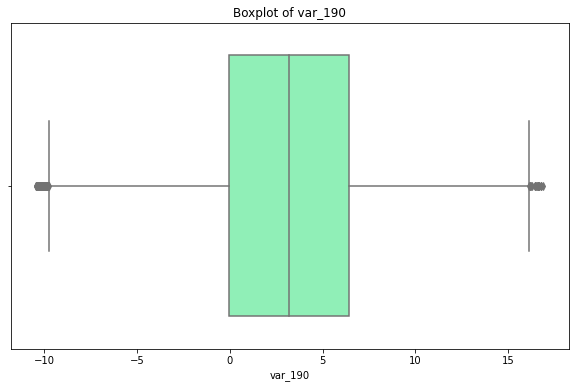

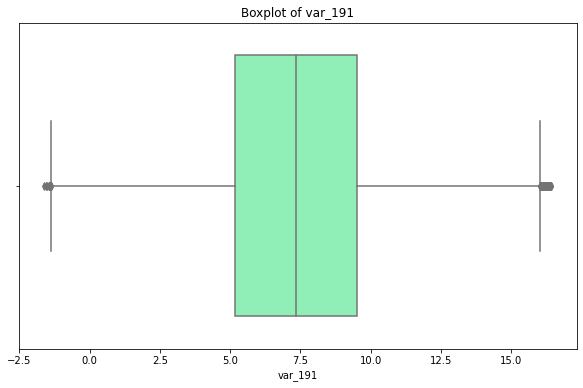

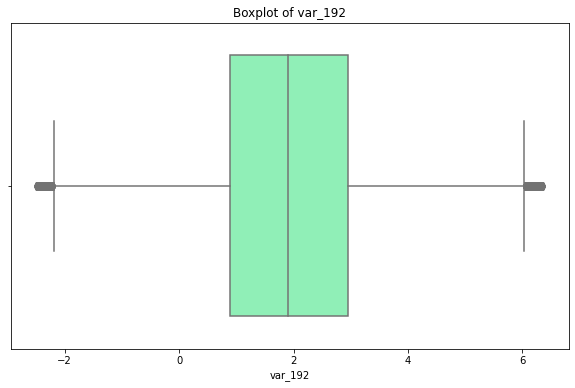

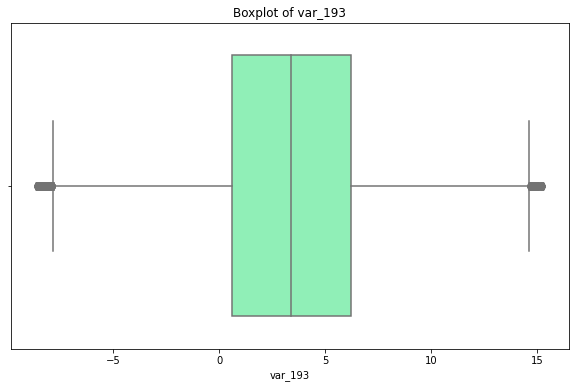

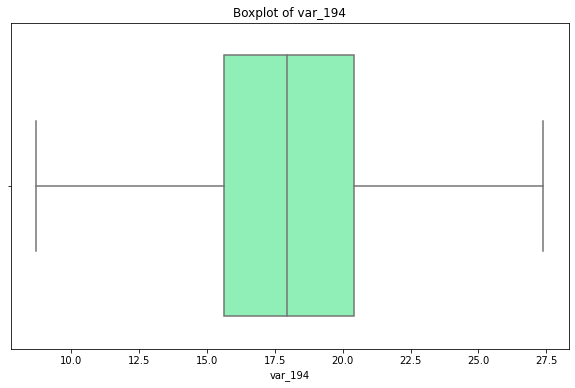

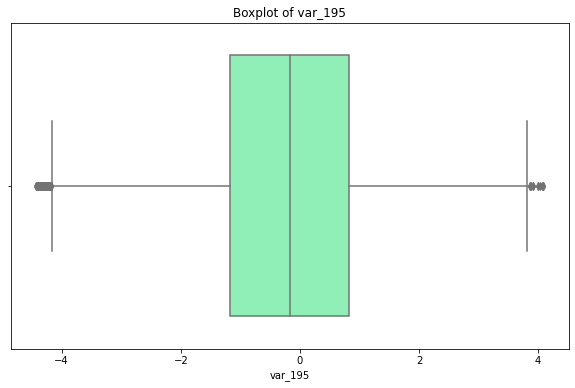

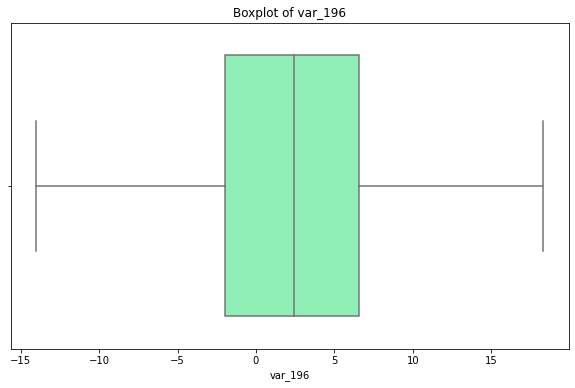

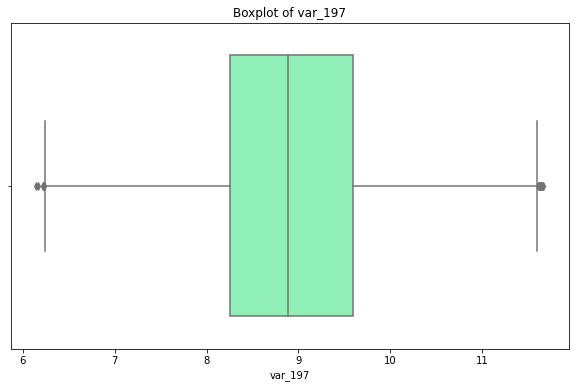

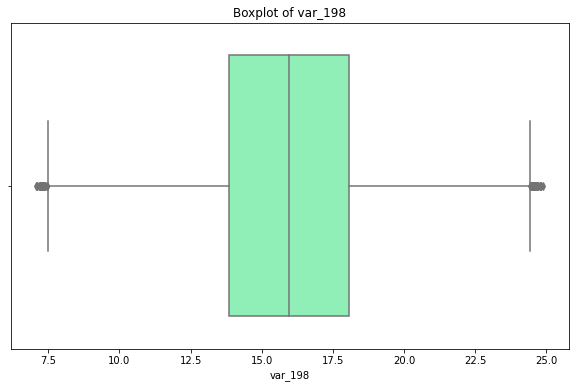

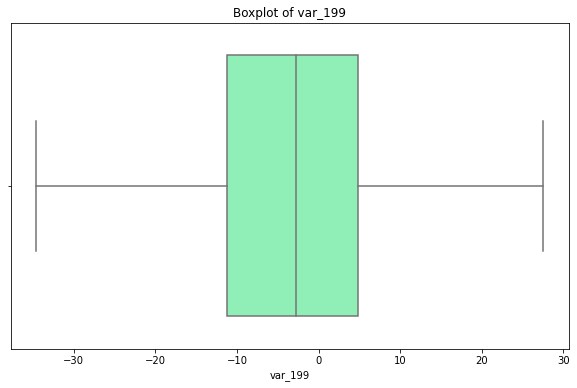

In [14]:


# Filter numeric columns
numeric_cols =df.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for each numerical feature to identify outliers
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column],palette='rainbow')
    plt.title(f'Boxplot of {column}')
    plt.show()



### Looking at the box plot we can say that most of the outliers  are correctly removed by z-score method ...

### None of the features are highly correlated with the target so no  need to drop them

## Using mutual_info_classif

In [15]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif


x = df.drop(columns=['target'])
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
select_feature = SelectKBest(mutual_info_classif, k=25).fit(x_train, y_train)


selected_features = x_train.columns[select_feature.get_support()]

print("Selected Features:", selected_features)


Selected Features: Index(['var_1', 'var_2', 'var_6', 'var_12', 'var_13', 'var_21', 'var_26',
       'var_44', 'var_75', 'var_78', 'var_80', 'var_81', 'var_93', 'var_99',
       'var_108', 'var_110', 'var_133', 'var_139', 'var_146', 'var_149',
       'var_166', 'var_174', 'var_177', 'var_190', 'var_191'],
      dtype='object')


## Random Forest on mutual_info

Accuracy is:  0.899858881636973


<AxesSubplot:>

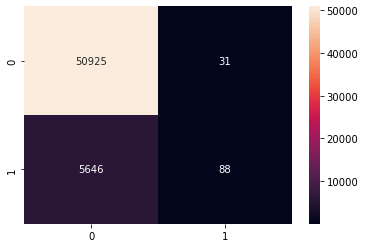

In [16]:



x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [17]:
print(f"accuracy_score using mutual information and random forest classifier : " ,{ac_2*100})

accuracy_score using mutual information and random forest classifier :  {89.9858881636973}


## Random Forest Importance for feature selection

In [18]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [19]:
feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
top_25_features = feature_scores.head(25).index

In [20]:

x_train_3=x_train[top_25_features]
x_test_3=x_test[top_25_features]

In [21]:
x_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132274 entries, 74839 to 129134
Data columns (total 25 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   var_81   132274 non-null  float64
 1   var_12   132274 non-null  float64
 2   var_139  132274 non-null  float64
 3   var_174  132274 non-null  float64
 4   var_53   132274 non-null  float64
 5   var_26   132274 non-null  float64
 6   var_110  132274 non-null  float64
 7   var_6    132274 non-null  float64
 8   var_76   132274 non-null  float64
 9   var_109  132274 non-null  float64
 10  var_22   132274 non-null  float64
 11  var_146  132274 non-null  float64
 12  var_166  132274 non-null  float64
 13  var_80   132274 non-null  float64
 14  var_99   132274 non-null  float64
 15  var_2    132274 non-null  float64
 16  var_165  132274 non-null  float64
 17  var_78   132274 non-null  float64
 18  var_133  132274 non-null  float64
 19  var_13   132274 non-null  float64
 20  var_40   132274 non-nu

In [22]:

clf = RandomForestClassifier()


clf.fit(x_train_3, y_train)


# Predict on the test set results

y_pred = clf.predict(x_test_3)


Model accuracy score with top 25  variable using randomforestimportance : 89.9894


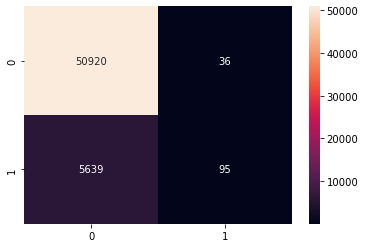

In [23]:
cm_3 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_3,annot=True,fmt="d")

print('Model accuracy score with top 25  variable using randomforestimportance : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

## Using pca for feature selection

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features for the training set
df_test.drop(columns=['ID_code'],inplace=True)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

# Apply PCA to reduce the number of features to 25 for the training set
pca = PCA(n_components=25)
x_train_pca = pca.fit_transform(x_train_scaled)

# Standardize the features for the test set using the same scaler fitted on the training set
x_test_scaled = scaler.transform(x_test)
df_test_scaled= scaler.transform(df_test)

# Transform the test set using the same PCA fitted on the training set
x_test_pca = pca.transform(x_test_scaled)
df_test_pca=pca.transform(df_test_scaled)

# Optionally convert the result back to DataFrames for better readability
x_train_pca_df = pd.DataFrame(x_train_pca, columns=[f'PC{i+1}' for i in range(25)])
x_test_pca_df = pd.DataFrame(x_test_pca, columns=[f'PC{i+1}' for i in range(25)])
df_test_pca_df=pd.DataFrame(df_test_pca,columns=[f'PC{i+1}' for i in range(25)])

# Display the new x_train and x_test after PCA
print(x_train_pca_df)
print(x_test_pca_df)


             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      -1.114061  0.148100 -0.761718 -0.086870 -0.719857  0.117493  0.672134   
1      -0.589439 -0.422145 -0.529156 -1.287397 -1.177488 -0.126077 -0.341747   
2      -1.453578  0.124755 -0.780759  1.067875 -0.780981 -0.924932 -1.231257   
3      -2.759465  0.976923 -0.110121 -1.759711  0.995751 -2.211315 -0.325731   
4      -0.325087 -2.434609 -0.776521  1.049475 -1.224927  0.712363  0.486169   
...          ...       ...       ...       ...       ...       ...       ...   
132269 -0.434821 -2.299967 -0.002436  0.959860  1.200091  1.122888  0.750217   
132270  2.115647  0.053918  0.832467 -0.079101  0.502747  0.981470  2.133902   
132271  0.552777  0.025028 -1.830011  1.013925 -1.401306 -1.083760 -1.278142   
132272 -0.754364 -0.287867 -0.293602  0.362110 -0.147396  0.785520  1.344986   
132273 -0.113318  0.517357  0.172648 -0.763811 -1.070218 -0.537656  0.513020   

             PC8       PC9      PC10  .

Model accuracy score with top 25  variable using principal component analysis : 90.2240


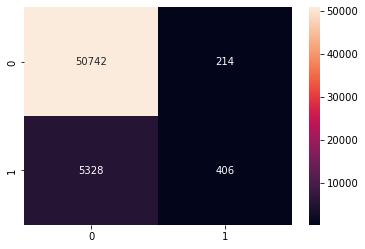

In [25]:
model=RandomForestClassifier()
model.fit(x_train_pca_df,y_train)
y_pred=model.predict(x_test_pca_df)


cm_4 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_4,annot=True,fmt="d")
print('Model accuracy score with top 25  variable using principal component analysis : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

## Applying logistic regression on all of them

In [26]:
from sklearn.linear_model import LogisticRegression
model_final=LogisticRegression()
model_final.fit(x_train_pca_df,y_train)

y_pred =model_final.predict(x_test_pca_df)
accuracy_score(y_test,y_pred)

0.901746339742459

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_2,y_train)

y_pred =model.predict(x_test_2)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9001763979537838

In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_3,y_train)

y_pred =model.predict(x_test_3)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.901181866290351

## So the best model so far is using Logistic regression and pca feature selection

## Applying the same thing for test.csv

In [29]:
final_pred=model_final.predict(df_test_pca_df)

In [30]:
submission=pd.DataFrame()

In [31]:
submission_sample=pd.read_csv("/home/harshit/Desktop/QuantForecast/Assignment2/santander-customer-transaction-prediction/sample_submission.csv")

In [32]:
submission['ID_code']=submission_sample['ID_code']
submission['target']=final_pred

In [33]:
submission.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [34]:
submission.to_csv('submission.csv',index=False)